# Regression of Bike Sharing Systems

https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset

Author
ShuCheng (Bernie) Chen

Coding Assistance from OpenAI (2024). ChatGPT (June 14 version) [Large language model]. https://chat.openai.com/chat

## Environment Setup

In [ ]:
%pip install ucimlrepo

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

Loading Data From UCI Database

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bike_sharing = fetch_ucirepo(id=275)

# data (as pandas dataframes)
X = bike_sharing.data.features
y = bike_sharing.data.targets

# metadata
print(bike_sharing.metadata)

# variable information
print(bike_sharing.variables)

{'uci_id': 275, 'name': 'Bike Sharing', 'repository_url': 'https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/275/data.csv', 'abstract': 'This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.', 'area': 'Social Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 17389, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['cnt'], 'index_col': ['instant'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2013, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5W894', 'creators': ['Hadi Fanaee-T'], 'intro_paper': {'title': 'Event labeling combining ensemble detectors and background knowledge', 'authors': 'Hadi Fanaee-T, João Gama', 'published_in': 'Progress in Artificial Intelli

## Exploratory Data Anaylsis

In [ ]:
df = pd.concat([X, y], axis=1)
df.head()

dteday  season  yr  mnth  hr  holiday  weekday  workingday  weathersit  \
0  2011-01-01       1   0     1   0        0        6           0           1   
1  2011-01-01       1   0     1   1        0        6           0           1   
2  2011-01-01       1   0     1   2        0        6           0           1   
3  2011-01-01       1   0     1   3        0        6           0           1   
4  2011-01-01       1   0     1   4        0        6           0           1   

   temp   atemp   hum  windspeed  cnt  
0  0.24  0.2879  0.81        0.0   16  
1  0.22  0.2727  0.80        0.0   40  
2  0.22  0.2727  0.80        0.0   32  
3  0.24  0.2879  0.75        0.0   13  
4  0.24  0.2879  0.75        0.0    1

In [ ]:
df.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

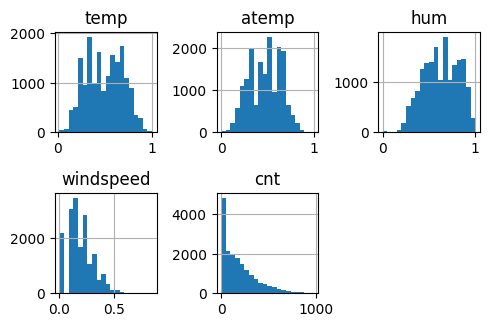

In [ ]:
data = df.copy()
data.drop(['dteday', 'yr'], axis=1, inplace=True)

numerical_features = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

data[numerical_features].hist(bins=20, figsize=(5, 5), layout=(3, 3))
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

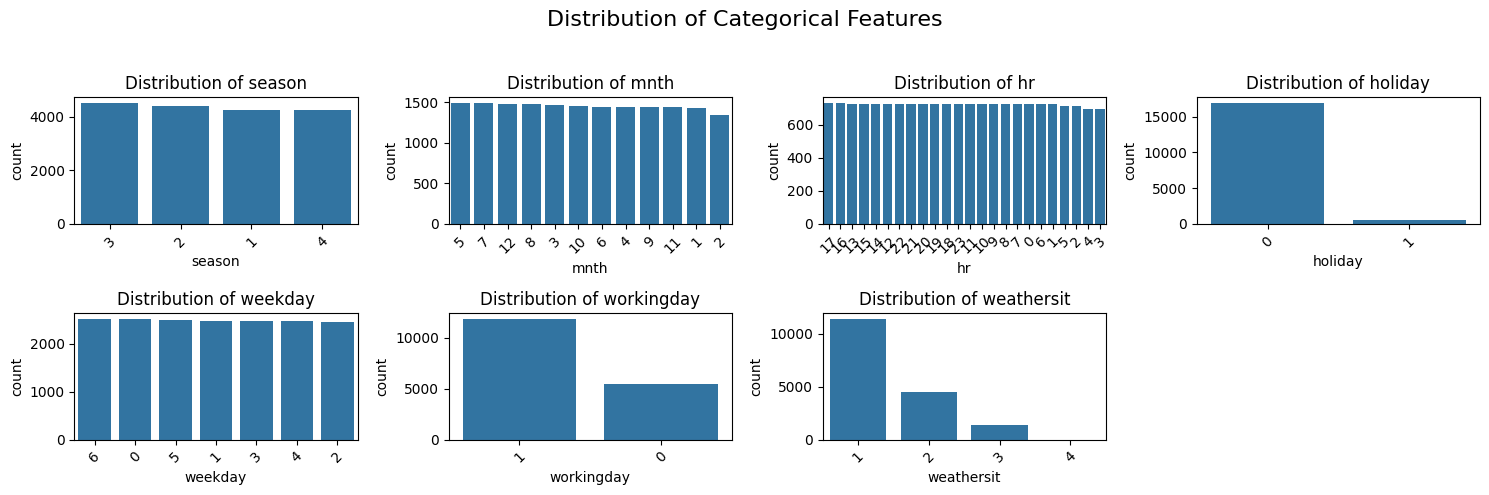

In [ ]:
categorical_features = ['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']

# Create a 2x4 grid for the plots
fig, axes = plt.subplots(2, 4, figsize=(15, 5))
fig.suptitle('Distribution of Categorical Features', fontsize=16)

# Iterate over the categorical features and create a countplot for each
for i, feature in enumerate(categorical_features):
    row = i // 4
    col = i % 4
    sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature}')
    for tick in axes[row, col].get_xticklabels():
        tick.set_rotation(45)

# Hide the empty subplot if the number of features is not a multiple of 4
if len(categorical_features) < 8:
    fig.delaxes(axes[1, 3])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

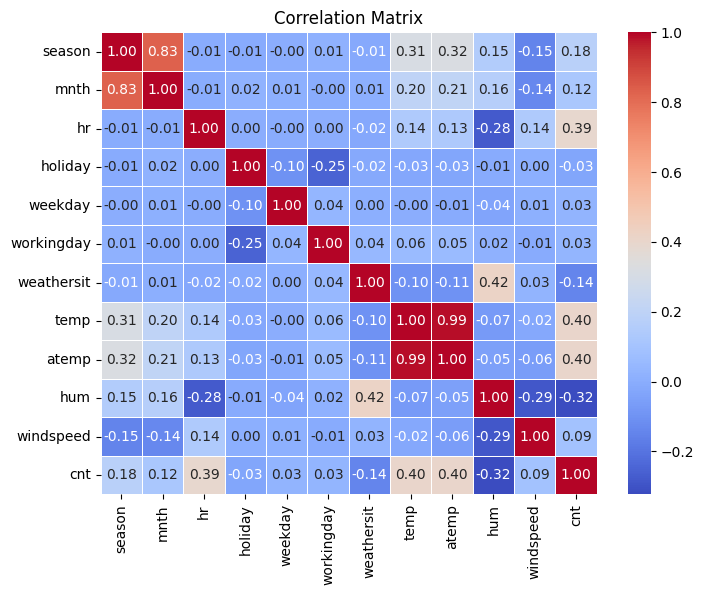

In [ ]:
plt.figure(figsize=(8, 6))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

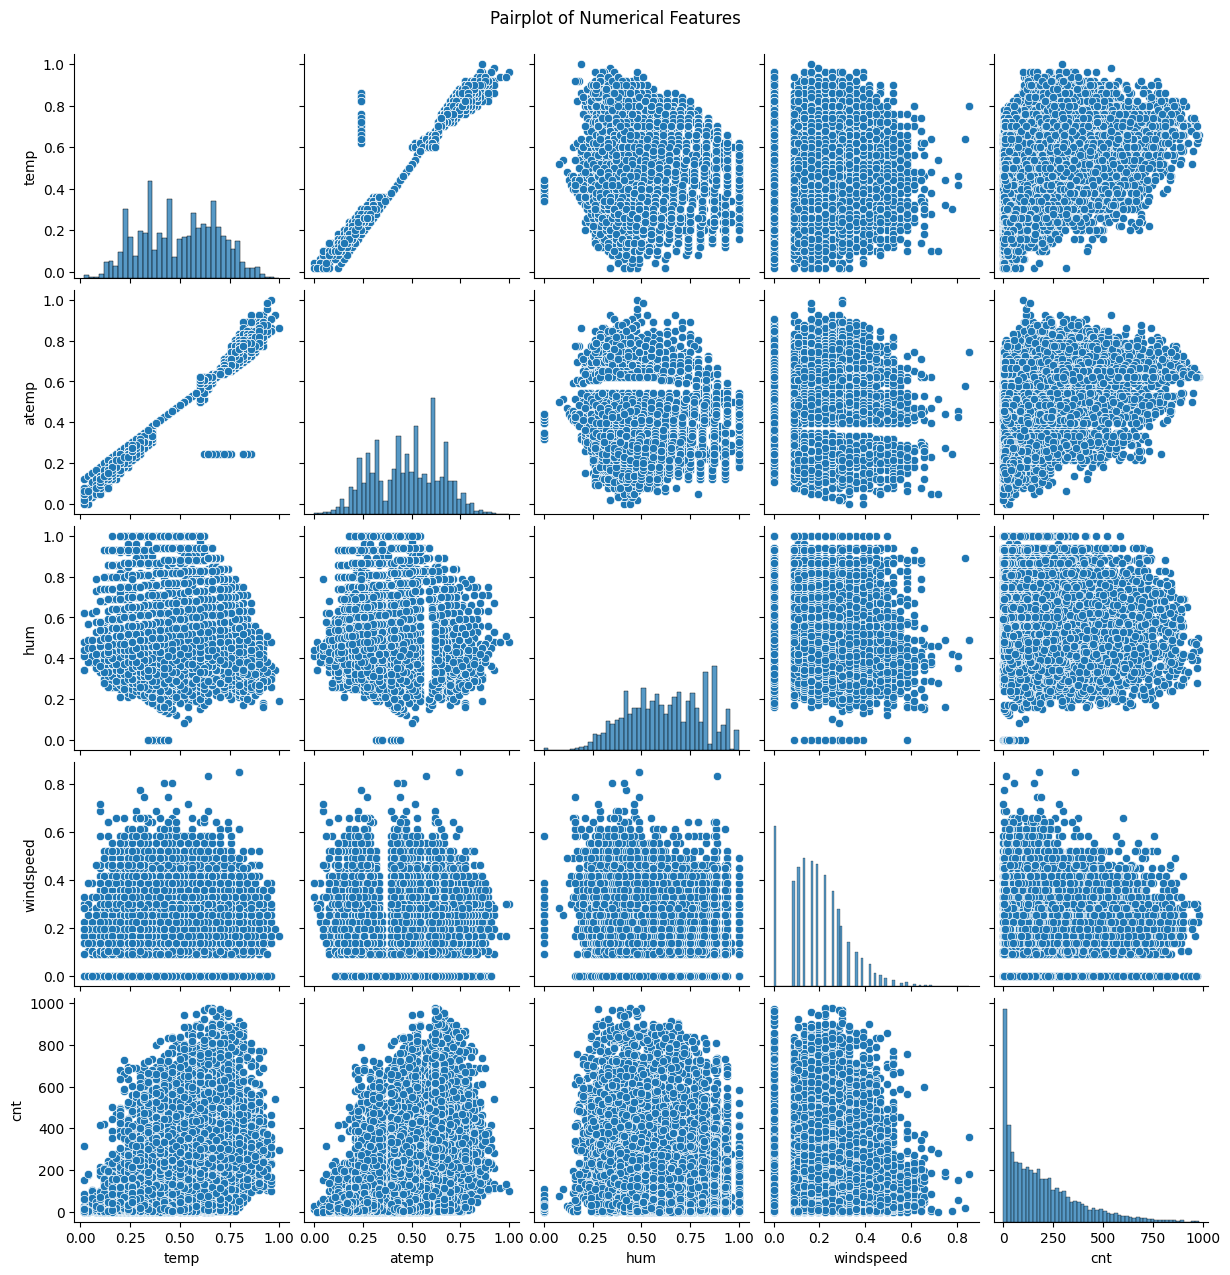

In [ ]:
sns.pairplot(df[numerical_features])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

<Figure size 2500x2500 with 0 Axes>

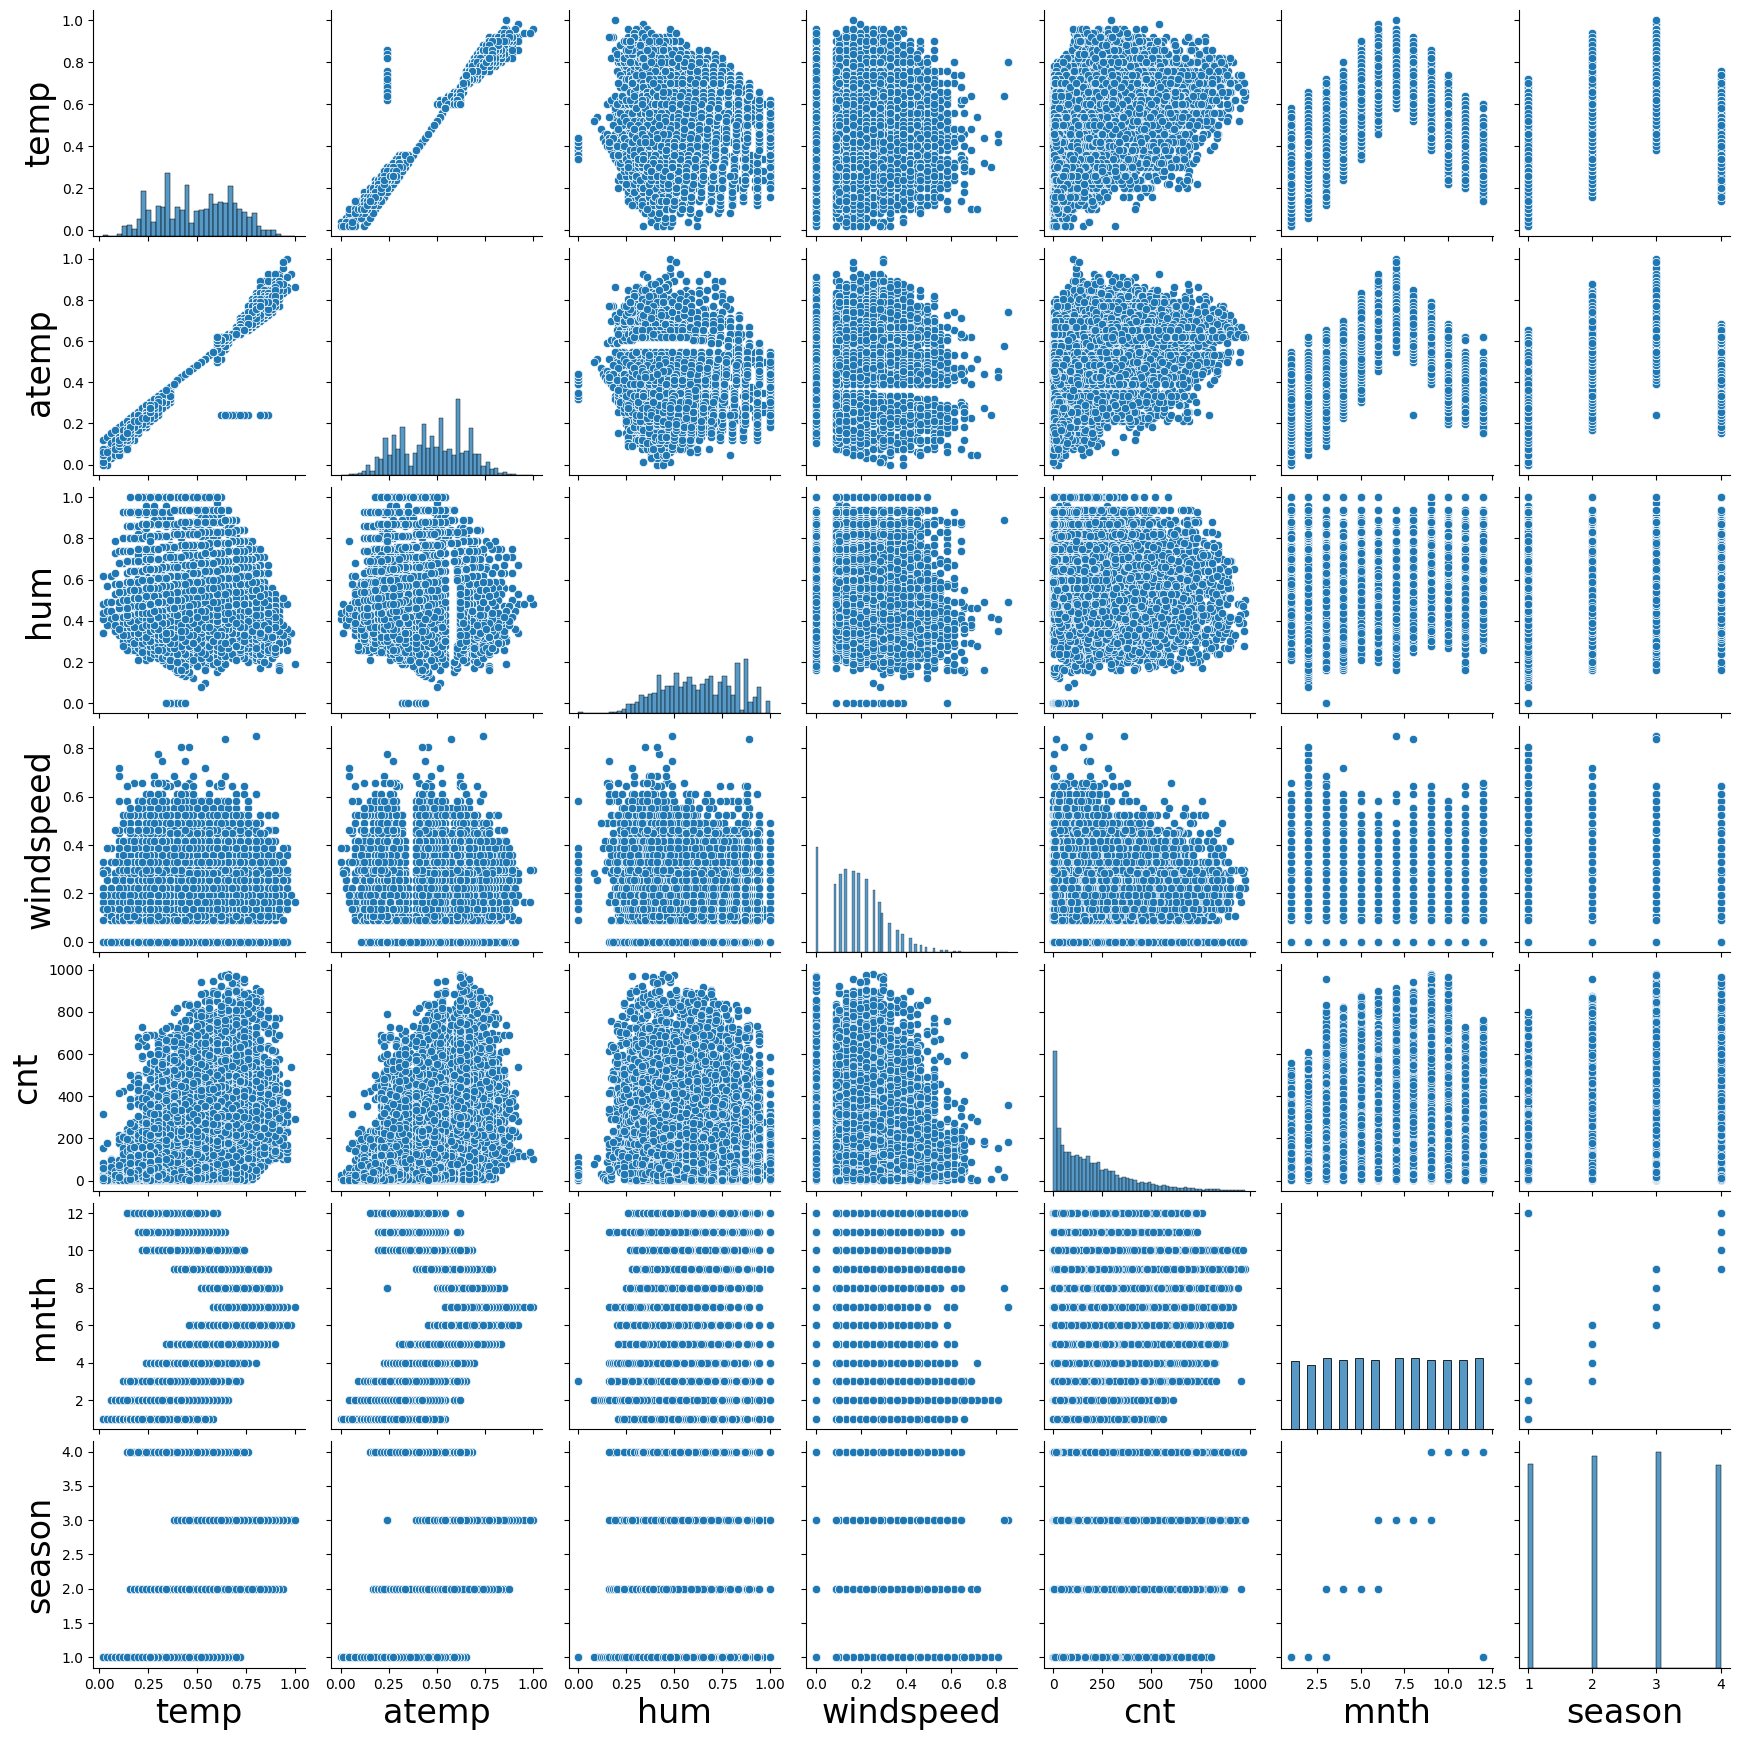

In [ ]:
additional_features = ['mnth', 'season']

features_to_plot = np.concatenate([numerical_features, additional_features])

# Create the pairplot
# sns.pairplot(df[features_to_plot])
plt.figure(figsize=(25, 25))
pairplot = sns.pairplot(df[features_to_plot], height=2.5)
# Add a title and adjust the plot

for ax in pairplot.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=24)  # Adjust fontsize as needed
    ax.set_ylabel(ax.get_ylabel(), fontsize=24)

plt.show()

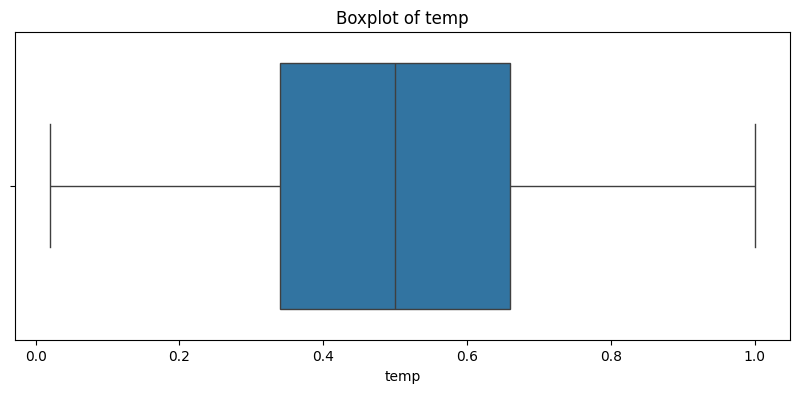

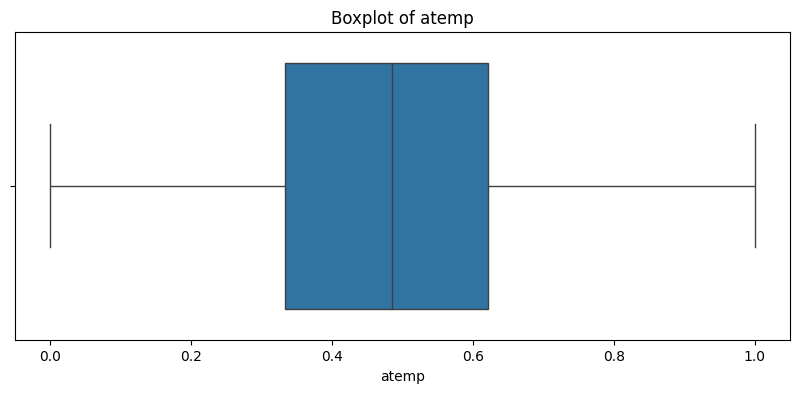

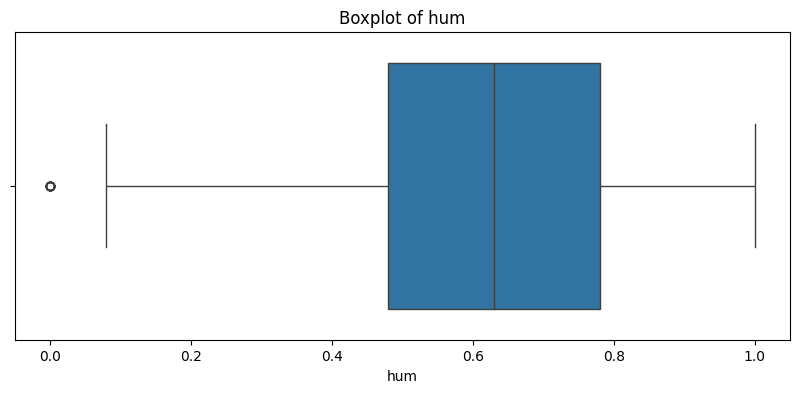

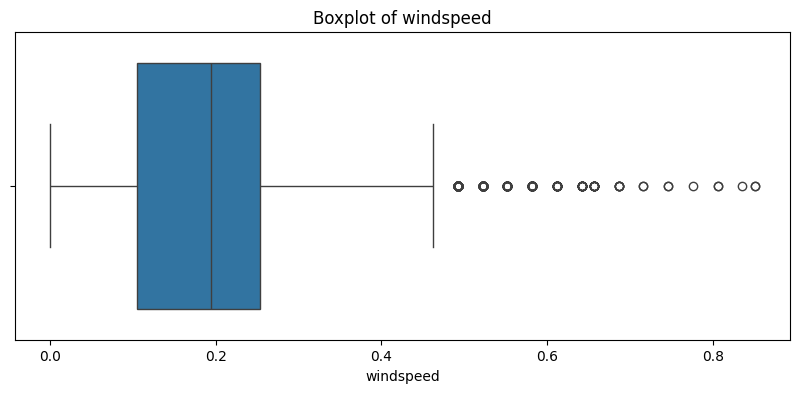

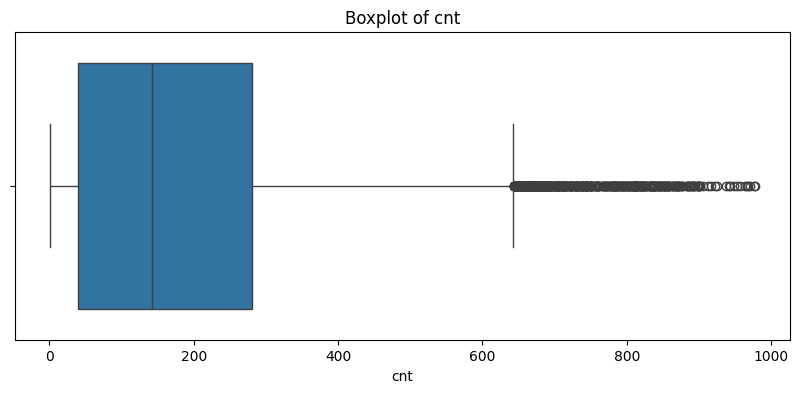

In [ ]:
for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(data=df, x=feature)
    plt.title(f'Boxplot of {feature}')
    plt.show()


## Data Pre-processing

In [ ]:
data = df.copy()
data.drop(['dteday', 'yr'], axis=1, inplace=True)
data.head()

season  mnth  hr  holiday  weekday  workingday  weathersit  temp   atemp  \
0       1     1   0        0        6           0           1  0.24  0.2879   
1       1     1   1        0        6           0           1  0.22  0.2727   
2       1     1   2        0        6           0           1  0.22  0.2727   
3       1     1   3        0        6           0           1  0.24  0.2879   
4       1     1   4        0        6           0           1  0.24  0.2879   

    hum  windspeed  cnt  
0  0.81        0.0   16  
1  0.80        0.0   40  
2  0.80        0.0   32  
3  0.75        0.0   13  
4  0.75        0.0    1

In [ ]:
season_mapping = {
    1: "winter",
    2: "spring",
    3: "summer",
    4: "fall",
}

month_mapping = {
    1: "jan",
    2: "feb",
    3: "mar",
    4: "apr",
    5: "may",
    6: "jun",
    7: "jul",
    8: "aug",
    9: "sep",
    10: "oct",
    11: "nov",
    12: "dec",
}

hour_mapping = {
    0: "night",
    1: "night",
    2: "night",
    3: "night",
    4: "night",
    5: "night",
    6: "morning",
    7: "morning",
    8: "morning",
    9: "morning",
    10: "morning",
    11: "morning",
    12: "afternoon",
    13: "afternoon",
    14: "afternoon",
    15: "afternoon",
    16: "afternoon",
    17: "afternoon",
    18: "evening",
    19: "evening",
    20: "evening",
    21: "evening",
    22: "evening",
    23: "evening",
}

weekday_mapping = {
    0: "mon",
    1: "tue",
    2: "wed",
    3: "thu",
    4: "fri",
    5: "sat",
    6: "sun",
}

weathersit_mapping = {
    1: "clear",
    2: "mist",
    3: "light_rain",
    4: "heavy_rain",
}

data['season'] = data['season'].map(season_mapping)
data['mnth'] = data['mnth'].map(month_mapping)
data['hr'] = data['hr'].map(hour_mapping)
data['weekday'] = data['weekday'].map(weekday_mapping)
data['weathersit'] = data['weathersit'].map(weathersit_mapping)

data.head()

season mnth     hr  holiday weekday  workingday weathersit  temp   atemp  \
0  winter  jan  night        0     sun           0      clear  0.24  0.2879   
1  winter  jan  night        0     sun           0      clear  0.22  0.2727   
2  winter  jan  night        0     sun           0      clear  0.22  0.2727   
3  winter  jan  night        0     sun           0      clear  0.24  0.2879   
4  winter  jan  night        0     sun           0      clear  0.24  0.2879   

    hum  windspeed  cnt  
0  0.81        0.0   16  
1  0.80        0.0   40  
2  0.80        0.0   32  
3  0.75        0.0   13  
4  0.75        0.0    1

In [ ]:
data['weathersit'].value_counts() # imbalance need to treat later

weathersit
clear         11413
mist           4544
light_rain     1419
heavy_rain        3
Name: count, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  object 
 1   mnth        17379 non-null  object 
 2   hr          17379 non-null  object 
 3   holiday     17379 non-null  int64  
 4   weekday     17379 non-null  object 
 5   workingday  17379 non-null  int64  
 6   weathersit  17379 non-null  object 
 7   temp        17379 non-null  float64
 8   atemp       17379 non-null  float64
 9   hum         17379 non-null  float64
 10  windspeed   17379 non-null  float64
 11  cnt         17379 non-null  int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 1.6+ MB


In [ ]:
df_encoded = pd.get_dummies(data, columns=['season', 'hr', 'weekday', 'weathersit'], drop_first=True, dtype=int)

# Display the first few rows of the preprocessed DataFrame
df_encoded.head()

mnth  holiday  workingday  temp   atemp   hum  windspeed  cnt  \
0  jan        0           0  0.24  0.2879  0.81        0.0   16   
1  jan        0           0  0.22  0.2727  0.80        0.0   40   
2  jan        0           0  0.22  0.2727  0.80        0.0   32   
3  jan        0           0  0.24  0.2879  0.75        0.0   13   
4  jan        0           0  0.24  0.2879  0.75        0.0    1   

   season_spring  season_summer  ...  hr_night  weekday_mon  weekday_sat  \
0              0              0  ...         1            0            0   
1              0              0  ...         1            0            0   
2              0              0  ...         1            0            0   
3              0              0  ...         1            0            0   
4              0              0  ...         1            0            0   

   weekday_sun  weekday_thu  weekday_tue  weekday_wed  weathersit_heavy_rain  \
0            1            0            0            0                      0   
1            1            0            0            0                      0   
2            1            0            0            0                      0   
3            1            0            0            0                      0   
4            1            0            0            0                      0   

   weathersit_light_rain  weathersit_mist  
0                      0                0  
1                      0                0  
2                      0                0  
3                      0                0  
4                      0                0  

[5 rows x 23 columns]

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   mnth                   17379 non-null  object 
 1   holiday                17379 non-null  int64  
 2   workingday             17379 non-null  int64  
 3   temp                   17379 non-null  float64
 4   atemp                  17379 non-null  float64
 5   hum                    17379 non-null  float64
 6   windspeed              17379 non-null  float64
 7   cnt                    17379 non-null  int64  
 8   season_spring          17379 non-null  int64  
 9   season_summer          17379 non-null  int64  
 10  season_winter          17379 non-null  int64  
 11  hr_evening             17379 non-null  int64  
 12  hr_morning             17379 non-null  int64  
 13  hr_night               17379 non-null  int64  
 14  weekday_mon            17379 non-null  int64  
 15  we

## Regression Models

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import ElasticNet, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [ ]:
X = df_encoded.drop(columns=['cnt', 'mnth'])
y = df_encoded['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=11)

# Display the shape of training and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

print("Shape of train_data:", train_data.shape)
print("Shape of trest_data:", X_test.shape)

Shape of X_train: (8689, 21)
Shape of X_test: (8690, 21)
Shape of train_data: (8689, 22)
Shape of trest_data: (8690, 21)


In [ ]:
def plot_residuals(lm_fit1):
  # Residual plot
  residuals = lm_fit1.resid
  fitted = lm_fit1.fittedvalues
  plt.figure(figsize=(12, 6))
  #This specifies that the figure should be 12 inches wid
  # Residual plot
  plt.subplot(1, 2, 1)
  plt.scatter(fitted, residuals)
  plt.axhline(0, color='red', linestyle='--')
  plt.xlabel('Fitted values')
  plt.ylabel('Residuals')
  plt.title('Residual Plot')
  # Normal QQ plot
  plt.subplot(1, 2, 2)
  sm.qqplot(residuals, line ='45', fit=True, ax=plt.gca())
  plt.title('Normal QQ Plot')
  plt.tight_layout()
  plt.show()

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X_train = train_data.drop(columns='cnt')
y_train = train_data['cnt']

X_test = test_data.drop(columns='cnt')
y_test = test_data['cnt']


# Calculate mean squared error (test error)

def evaluate_model_residuals(y_test, y_pred):
  residuals = y_test - y_pred

  plt.figure(figsize=(10, 6))
  plt.scatter(y_pred, residuals)
  plt.axhline(y=0, color='r', linestyle='--')
  plt.xlabel('Predicted Values')
  plt.ylabel('Residuals')
  plt.title('Residuals vs. Predicted Values')
  plt.show()

  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  print(f"Mean Squared Error: {mse}")
  print(f"R^2 Score: {r2}")

NameError: name 'train_data' is not defined

### 1. Ordinary Least Squares (OLS) Regression
Ordinary Least Squares (OLS) regression is a fundamental technique in linear regression analysis. It minimizes the sum of the squared differences between the observed and predicted values. This method provides a straightforward approach to understand the relationship between the independent and dependent variables.

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     342.4
Date:                Wed, 03 Jul 2024   Prob (F-statistic):               0.00
Time:                        23:13:02   Log-Likelihood:                -55032.
No. Observations:                8689   AIC:                         1.101e+05
Df Residuals:                    8668   BIC:                         1.103e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   182.31

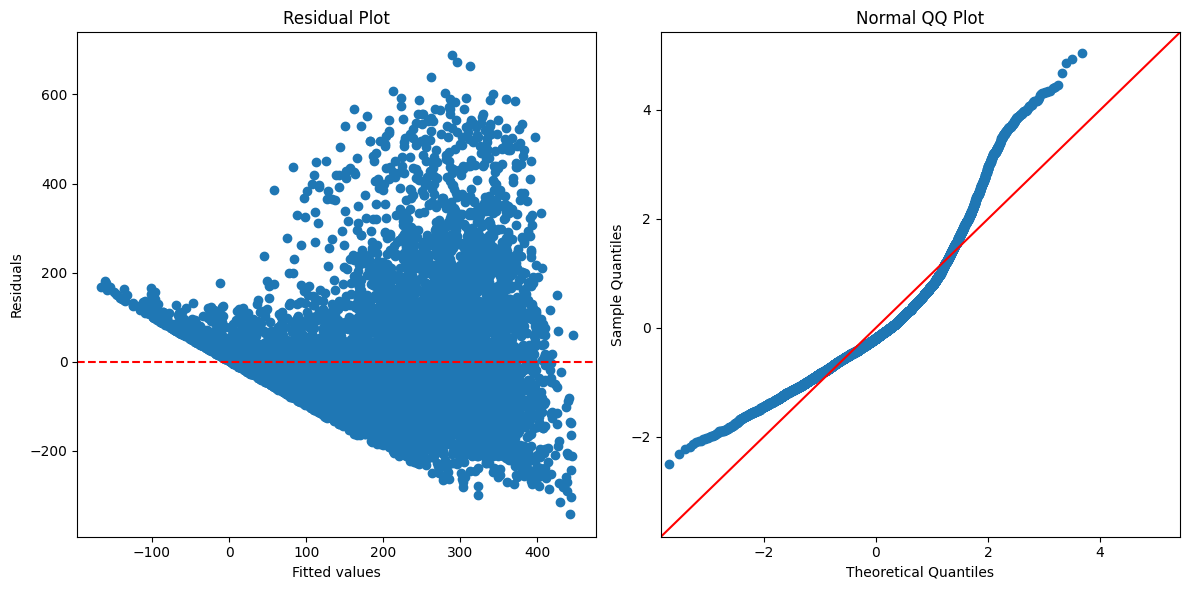

In [ ]:
# Define the response and the predictors
X = train_data.drop(columns='cnt')
X = sm.add_constant(X)
# Add a constant term to the predictors
y = train_data['cnt']
# Fit the multiple linear regression model
ols_model_1 = sm.OLS(y, X).fit()
# Display the summary of the regression
print(ols_model_1.summary())
plot_residuals(ols_model_1)

Adding Interaction Terms

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     294.8
Date:                Wed, 03 Jul 2024   Prob (F-statistic):               0.00
Time:                        23:12:52   Log-Likelihood:                -54967.
No. Observations:                8689   AIC:                         1.100e+05
Df Residuals:                    8664   BIC:                         1.102e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    59.95

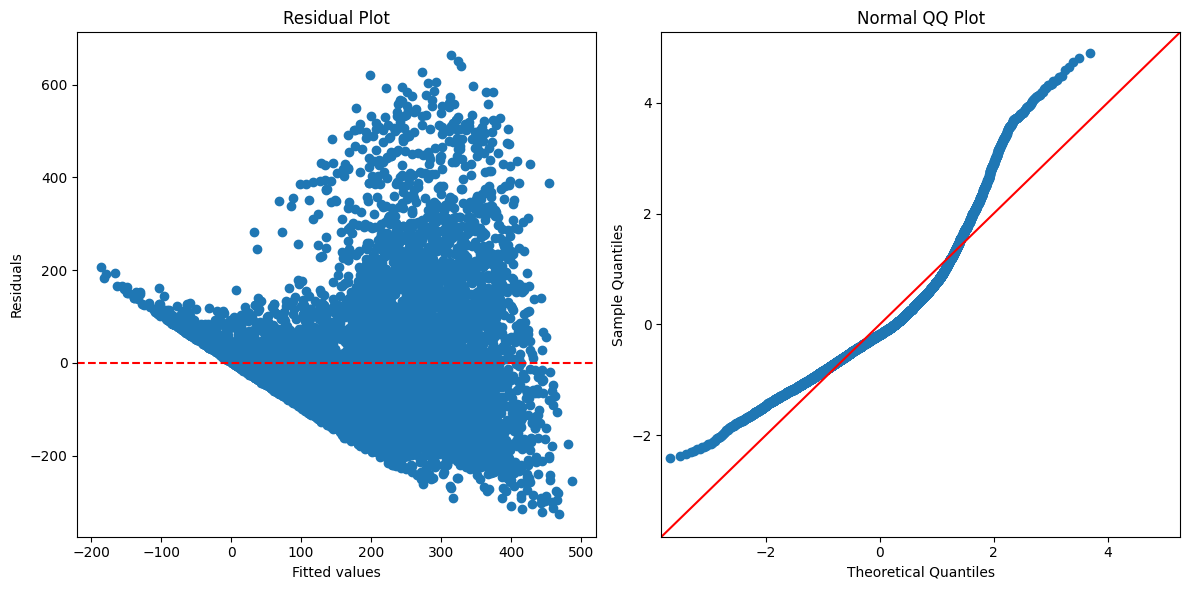

In [ ]:
# Create interaction terms
X_interaction = train_data.copy()
X_interaction['temp_atemp'] = X_interaction['temp'] * X_interaction['atemp']
X_interaction['hum_windspeed'] = X_interaction['hum'] * X_interaction['windspeed']
X_interaction['atemp_hum'] = X_interaction['atemp'] * X_interaction['hum']
X_interaction['windspeed_temp'] = X_interaction['windspeed'] * X_interaction['temp']

y_interaction = X_interaction['cnt']
X_interaction = X_interaction.drop(columns=['cnt'])
X_interaction = sm.add_constant(X_interaction)

lm_fit_interaction = sm.OLS(y_interaction, X_interaction).fit()

ols_model_2 = sm.OLS(y_interaction, X_interaction).fit()
print(ols_model_2.summary())
plot_residuals(ols_model_2)

                            OLS Regression Results                            
Dep. Variable:                log_cnt   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     821.1
Date:                Thu, 04 Jul 2024   Prob (F-statistic):               0.00
Time:                        08:34:26   Log-Likelihood:                -10198.
No. Observations:                8689   AIC:                         2.045e+04
Df Residuals:                    8664   BIC:                         2.062e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     3.51

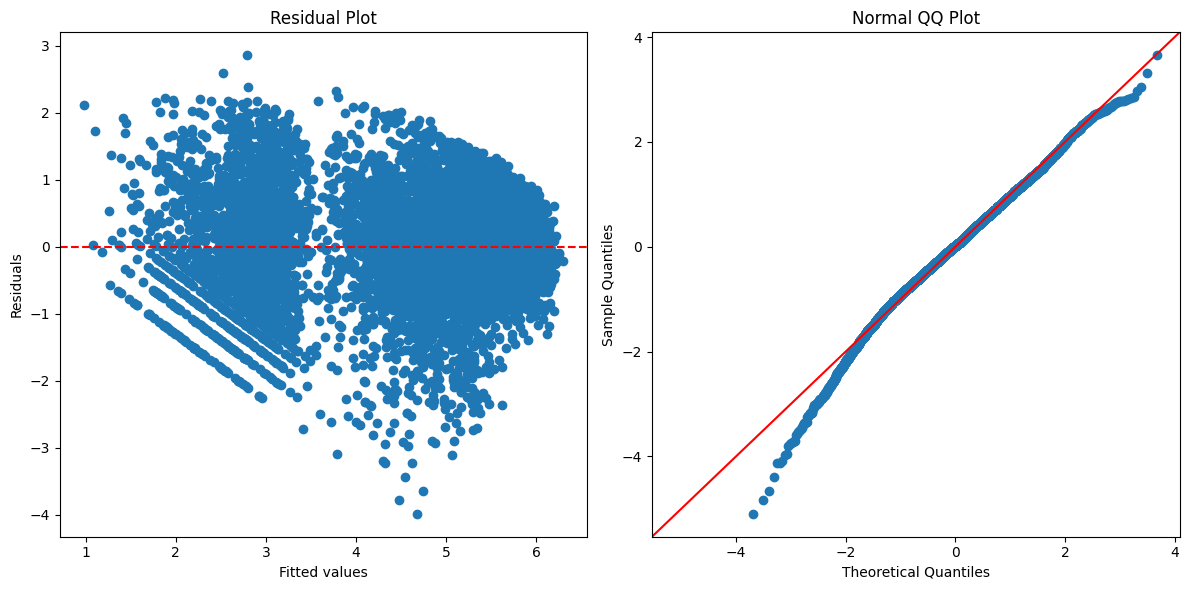

In [ ]:
X_transform = train_data.copy()
X_transform['log_cnt'] = np.log1p(df_encoded['cnt'])
X_transform['temp_atemp'] = X_transform['temp'] * X_transform['atemp']
X_transform['hum_windspeed'] = X_transform['hum'] * X_transform['windspeed']
X_transform['atemp_hum'] = X_transform['atemp'] * X_transform['hum']
X_transform['windspeed_temp'] = X_transform['windspeed'] * X_transform['temp']

# Log Transforming Target Variable
y_transform = X_transform['log_cnt']
X_transform = X_transform.drop(columns=['cnt', 'log_cnt'])
X_transform = sm.add_constant(X_transform)

ols_model_3 = sm.OLS(y_transform, X_transform).fit()
print(ols_model_3.summary())
plot_residuals(ols_model_3)

Removing windspeed with p-value 0.7659467329214524
Removing weathersit_heavy_rain with p-value 0.6040431224277527
Removing weekday_thu with p-value 0.5693079241705228
Removing atemp_hum with p-value 0.40291457619425386
Removing weekday_tue with p-value 0.22467104005420596
                            OLS Regression Results                            
Dep. Variable:                log_cnt   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     1037.
Date:                Wed, 03 Jul 2024   Prob (F-statistic):               0.00
Time:                        23:13:51   Log-Likelihood:                -10199.
No. Observations:                8689   AIC:                         2.044e+04
Df Residuals:                    8669   BIC:                         2.058e+04
Df Model:                          19                                         
Covariance Type:

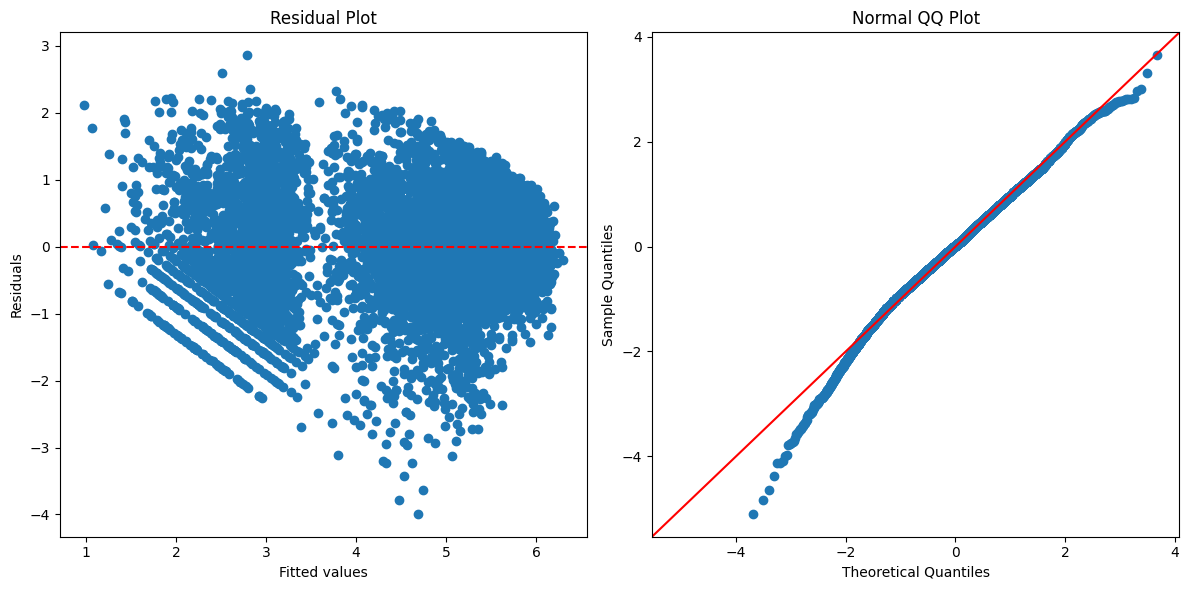

In [ ]:
X_eliminate = train_data.copy()
X_eliminate['log_cnt'] = np.log1p(df_encoded['cnt'])
X_eliminate['temp_atemp'] = X_eliminate['temp'] * X_eliminate['atemp']
X_eliminate['hum_windspeed'] = X_eliminate['hum'] * X_eliminate['windspeed']
X_eliminate['atemp_hum'] = X_eliminate['atemp'] * X_eliminate['hum']
X_eliminate['windspeed_temp'] = X_eliminate['windspeed'] * X_eliminate['temp']

y_eliminate = X_eliminate['log_cnt']
X_eliminate = X_eliminate.drop(columns=['cnt', 'log_cnt'])
X_eliminate = sm.add_constant(X_eliminate)

# Function to perform backward elimination
def backward_elimination(X, y, significance_level=0.05):
    removed = []
    while True:
        model = sm.OLS(y, X).fit()
        max_p_value = model.pvalues.max()
        if max_p_value > significance_level:
            excluded_feature = model.pvalues.idxmax()
            print(f"Removing {excluded_feature} with p-value {max_p_value}")
            removed.append(excluded_feature)
            X = X.drop(columns=[excluded_feature])
        else:
            break
    return X, removed, model

# Perform backward elimination
X_eliminate_opt, X_removed, ols_model_4 = backward_elimination(X_eliminate, y_eliminate)

print(ols_model_4.summary())

# Plot the residuals of the final model
plot_residuals(ols_model_4)

Mean Squared Error: 17960.65495660569
Mean Absolute Error: 97.96079088253231
R-squared: 0.4484881046513115


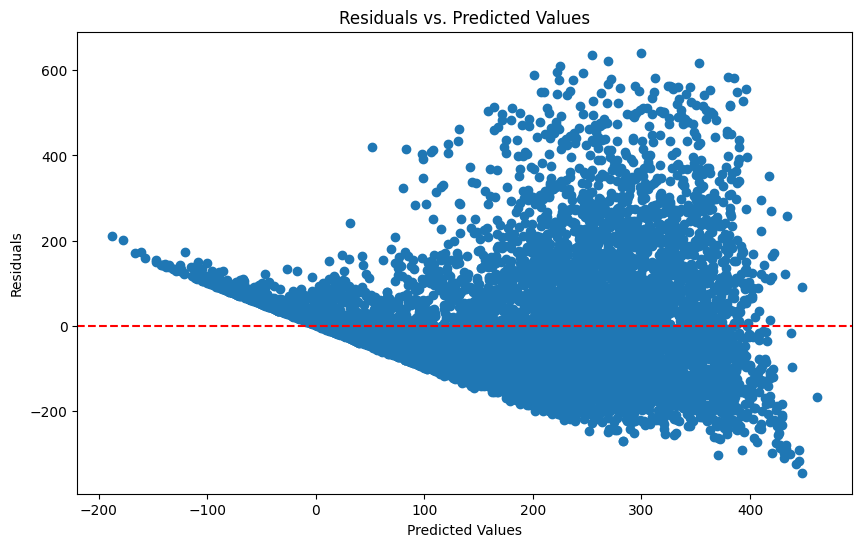

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X_test = test_data.drop(columns='cnt')
X_test = sm.add_constant(X_test)  # Add a constant term to the predictors
y_test = test_data['cnt']

# Make predictions using the fitted model
y_pred = ols_model_1.predict(X_test)

# Evaluate the predictions
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Plot residuals
import matplotlib.pyplot as plt

residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

Mean Squared Error: 0.5942146050251328
R^2 Score: 0.7051754202427745


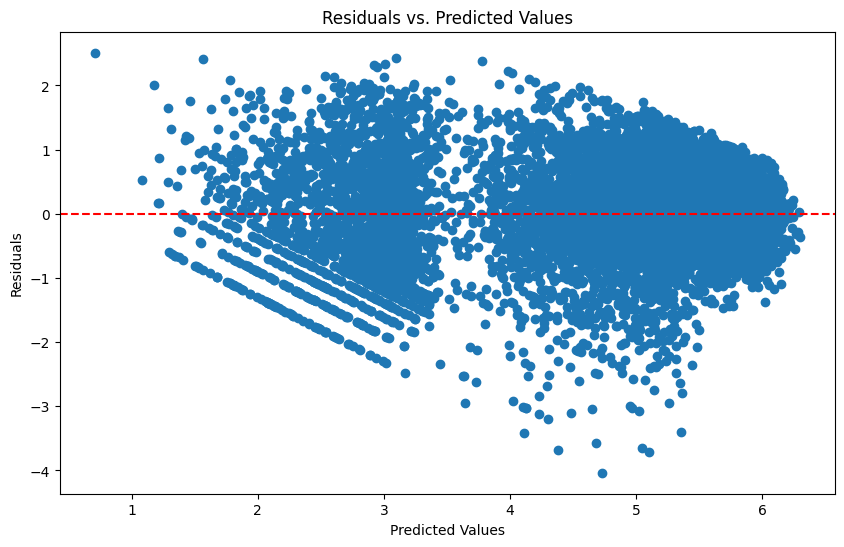

In [ ]:
X_test_transform = test_data.copy()
X_test_transform['log_cnt'] = np.log1p(test_data['cnt'])
X_test_transform['temp_atemp'] = X_test_transform['temp'] * X_test_transform['atemp']
X_test_transform['hum_windspeed'] = X_test_transform['hum'] * X_test_transform['windspeed']
X_test_transform['atemp_hum'] = X_test_transform['atemp'] * X_test_transform['hum']
X_test_transform['windspeed_temp'] = X_test_transform['windspeed'] * X_test_transform['temp']

# Log Transforming Target Variable
y_test_transform = X_test_transform['log_cnt']
X_test_transform = X_test_transform.drop(columns=['cnt', 'log_cnt'])
X_test_transform = sm.add_constant(X_test_transform)

# Predict on the test data
y_pred = ols_model_3.predict(X_test_transform)

# Evaluate the model
mse = mean_squared_error(y_test_transform, y_pred)
r2 = r2_score(y_test_transform, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot residuals
import matplotlib.pyplot as plt

residuals_transform = y_test_transform - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals_transform)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

Mean Squared Error: 0.5939699129859634
R^2 Score: 0.7052968262583924


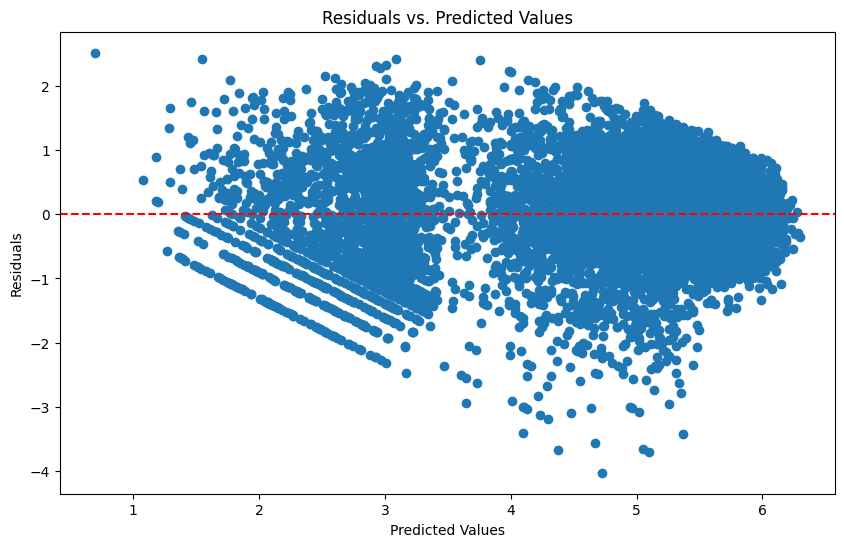

In [ ]:
X_test_eliminate = test_data.copy()
X_test_eliminate['log_cnt'] = np.log1p(test_data['cnt'])
X_test_eliminate['temp_atemp'] = X_test_eliminate['temp'] * X_test_eliminate['atemp']
X_test_eliminate['hum_windspeed'] = X_test_eliminate['hum'] * X_test_eliminate['windspeed']
X_test_eliminate['atemp_hum'] = X_test_eliminate['atemp'] * X_test_eliminate['hum']
X_test_eliminate['windspeed_temp'] = X_test_eliminate['windspeed'] * X_test_eliminate['temp']

# Log Transforming Target Variable
y_test_eliminate = X_test_eliminate['log_cnt']
X_test_eliminate = X_test_eliminate.drop(columns=np.concatenate((X_removed, ['cnt', 'log_cnt'])))
X_test_eliminate = sm.add_constant(X_test_eliminate)

# Predict on the test data
y_pred = ols_model_4.predict(X_test_eliminate)

# Evaluate the model
mse = mean_squared_error(y_test_eliminate, y_pred)
r2 = r2_score(y_test_eliminate, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot residuals
import matplotlib.pyplot as plt

residuals_eliminate = y_test_eliminate - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals_eliminate)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

### 2. Ridge Regression
Ridge Regression, also known as Tikhonov regularization, is a type of linear regression that includes a regularization term to prevent overfitting. It adds a penalty equivalent to the square of the magnitude of coefficients, which helps in dealing with multicollinearity and improves the model's generalization.

In [ ]:
X_train = train_data.drop(columns='cnt')
y_train = train_data['cnt']

X_test = test_data.drop(columns='cnt')
y_test = test_data['cnt']

Best alpha value found: 3.9
Coefficients:
[ -17.61220626    7.37287366  142.54619946  188.56948968 -153.93815559
   -3.12965682  -32.20135237  -56.47470623  -63.51290987  -36.71147321
  -37.18707367 -205.92579494   -2.6058805     3.49764546   12.84521309
    2.07328274   -1.09726481   -4.22178238  -13.10379281  -38.86903748
    1.86713053]


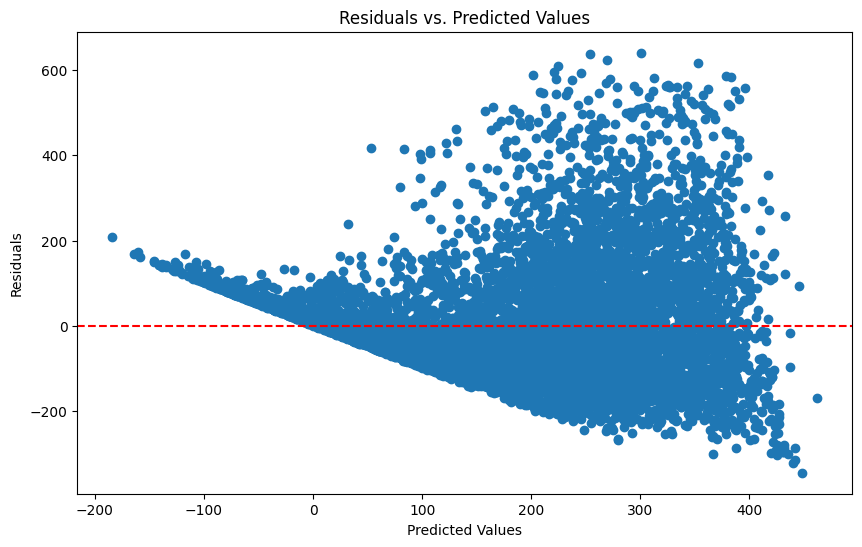

Mean Squared Error: 17941.340843625992
R^2 Score: 0.4490811767348266


In [ ]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define a range of alpha values to test
alphas = np.linspace(3.9, 4.2, 1000)

# Use RidgeCV to automatically select the best alpha value using cross-validation
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv.fit(X_train, y_train)

# Best alpha value
best_alpha = ridge_cv.alpha_
print("Best alpha value found:", best_alpha)

# Fit the Ridge model with the best alpha value
ridge = Ridge(alpha=best_alpha, max_iter=1000, random_state=5)
ridge.fit(X_train, y_train)

# Print coefficients
print("Coefficients:")
print(ridge.coef_)

# Make predictions on the test set
ridge_pred = ridge.predict(X_test)

evaluate_model_residuals(y_test, ridge_pred)

Best alpha value found: 0.166042865718753
Coefficients:
[-0.11843684  0.00480344  2.51464109  2.63636932 -0.80971958 -0.10237163
 -0.24677833 -0.30286929 -0.40858488 -0.18453809 -0.22144467 -2.38003482
  0.01791074  0.09348141  0.09572266 -0.01767846 -0.0427683  -0.0813044
 -0.34814291 -0.39047402  0.04842748 -3.16851463 -0.53946978 -0.16991165
  0.63572056]


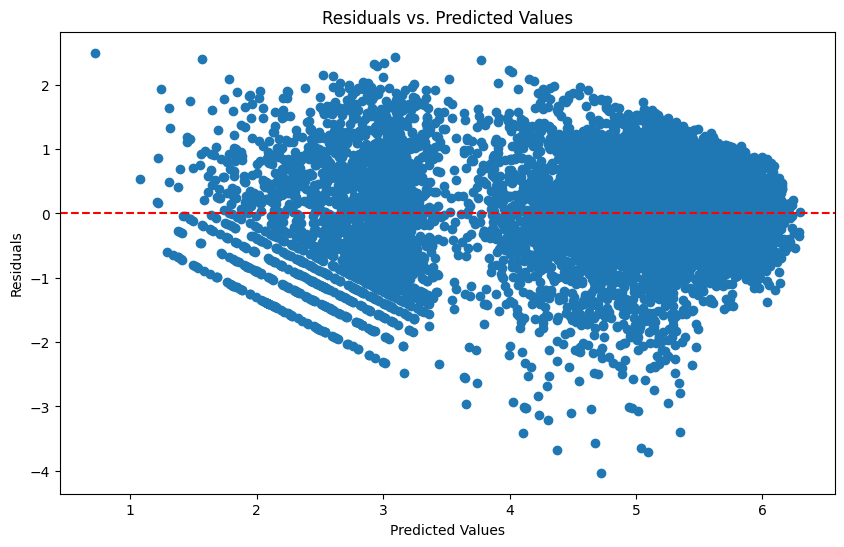

Mean Squared Error: 0.59419586864443
R^2 Score: 0.7051847164558264


In [ ]:
# Interaction Terms & Log transform the target variable
train_data_log = train_data.copy()
test_data_log = test_data.copy()

train_data_log['temp_atemp'] = train_data_log['temp'] * train_data_log['atemp']
train_data_log['hum_windspeed'] = train_data_log['hum'] * train_data_log['windspeed']
train_data_log['atemp_hum'] = train_data_log['atemp'] * train_data_log['hum']
train_data_log['windspeed_temp'] = train_data_log['windspeed'] * train_data_log['temp']

test_data_log['temp_atemp'] = test_data_log['temp'] * test_data_log['atemp']
test_data_log['hum_windspeed'] = test_data_log['hum'] * test_data_log['windspeed']
test_data_log['atemp_hum'] = test_data_log['atemp'] * test_data_log['hum']
test_data_log['windspeed_temp'] = test_data_log['windspeed'] * test_data_log['temp']

X_train = train_data_log.drop(columns='cnt')
X_test = test_data_log.drop(columns='cnt')

y_train = np.log1p(train_data_log['cnt'])
y_test = np.log1p(test_data_log['cnt'])

# Define a range of alpha values to test
alphas = np.logspace(-1, 1, 1000)

# Use RidgeCV to automatically select the best alpha value using cross-validation
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv.fit(X_train, y_train)

# Best alpha value
best_alpha = ridge_cv.alpha_
print("Best alpha value found:", best_alpha)

# Fit the Ridge model with the best alpha value
ridge = Ridge(alpha=best_alpha, max_iter=1000, random_state=5)
ridge.fit(X_train, y_train)

# Print coefficients
print("Coefficients:")
print(ridge.coef_)

# Make predictions on the test set
ridge_pred = ridge.predict(X_test)

evaluate_model_residuals(y_test, ridge_pred)

Interaction Terms and Log Transformation

In [ ]:
# Interaction Terms & Log transform the target variable
train_data_log = train_data.copy()
test_data_log = test_data.copy()

train_data_log['temp_atemp'] = train_data_log['temp'] * train_data_log['atemp']
train_data_log['hum_windspeed'] = train_data_log['hum'] * train_data_log['windspeed']
train_data_log['atemp_hum'] = train_data_log['atemp'] * train_data_log['hum']
train_data_log['windspeed_temp'] = train_data_log['windspeed'] * train_data_log['temp']

test_data_log['temp_atemp'] = test_data_log['temp'] * test_data_log['atemp']
test_data_log['hum_windspeed'] = test_data_log['hum'] * test_data_log['windspeed']
test_data_log['atemp_hum'] = test_data_log['atemp'] * test_data_log['hum']
test_data_log['windspeed_temp'] = test_data_log['windspeed'] * test_data_log['temp']

X_train = train_data_log.drop(columns='cnt')
X_test = test_data_log.drop(columns='cnt')

y_train = np.log1p(train_data_log['cnt'])
y_test = np.log1p(test_data_log['cnt'])


pipelineElasticNet = Pipeline([
    ('scaler', StandardScaler()),
    ('elasticnet', ElasticNet(l1_ratio=0, max_iter=100, random_state=5))
])

# Define the parameter grid with alpha values for ElasticNet
param_grid = {
    'elasticnet__alpha': np.logspace(-5, -1, 50), # Adjust alpha values as needed
}

# Setup GridSearchCV with 5-fold cross-validation
grid_searchElasticNet = GridSearchCV(estimator=pipelineElasticNet, param_grid=param_grid,
                                     scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_searchElasticNet.fit(X_train, y_train)

# Print the best alpha parameter found
print("Best alpha parameter:", grid_searchElasticNet.best_params_['elasticnet__alpha'])

# Get the best model
best_model = grid_searchElasticNet.best_estimator_

# Print coefficients of the final ElasticNet model
print("Coefficients of the final ElasticNet model:")
elasticnet_coefs = best_model.named_steps['elasticnet'].coef_
print(elasticnet_coefs)

# Predict on test set
y_pred = best_model.predict(X_test)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best alpha parameter: 0.002329951810515372
Coefficients of the final ElasticNet model:
[-0.01923911  0.00663044  0.53944966  0.32226504 -0.18128266 -0.03209834
 -0.10916567 -0.14148299 -0.17608616 -0.07716331 -0.09261231 -1.02475377
  0.00960367  0.03208035  0.03742007 -0.00607408 -0.01474437 -0.02814707
 -0.00408733 -0.10544496  0.02188577 -0.52262794 -0.03984273  0.01361139
  0.06457716]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.680e+03, tolerance: 1.742e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


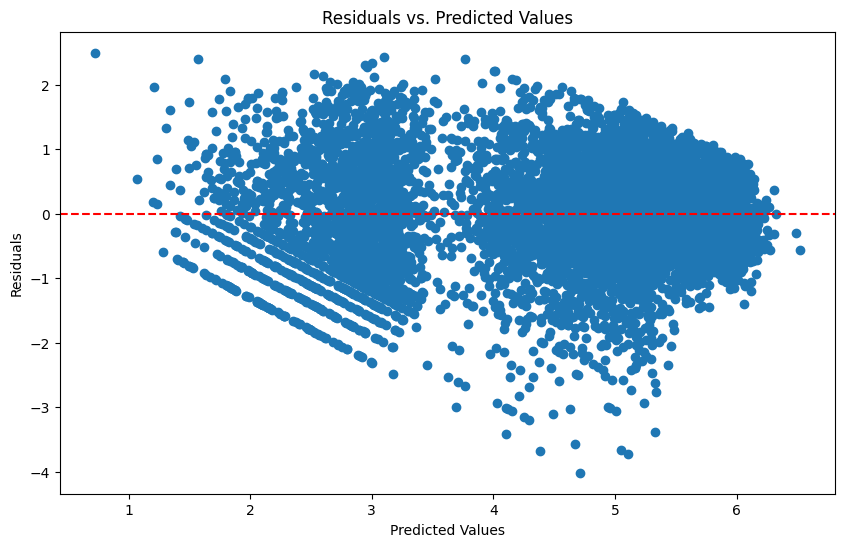

Mean Squared Error: 0.594327191536456
R^2 Score: 0.7051195594971675


In [ ]:
evaluate_model_residuals(y_test, y_pred)

In [ ]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming train_data and test_data are already defined and loaded

train_data_log = train_data.copy()
test_data_log = test_data.copy()

# Create interaction terms
train_data_log['temp_atemp'] = train_data_log['temp'] * train_data_log['atemp']
train_data_log['hum_windspeed'] = train_data_log['hum'] * train_data_log['windspeed']
train_data_log['atemp_hum'] = train_data_log['atemp'] * train_data_log['hum']
train_data_log['windspeed_temp'] = train_data_log['windspeed'] * train_data_log['temp']

test_data_log['temp_atemp'] = test_data_log['temp'] * test_data_log['atemp']
test_data_log['hum_windspeed'] = test_data_log['hum'] * test_data_log['windspeed']
test_data_log['atemp_hum'] = test_data_log['atemp'] * test_data_log['hum']
test_data_log['windspeed_temp'] = test_data_log['windspeed'] * test_data_log['temp']

X_train = train_data_log.drop(columns='cnt')
X_test = test_data_log.drop(columns='cnt')

y_train = np.log1p(train_data_log['cnt'])
y_test = np.log1p(test_data_log['cnt'])

pipelineRidge = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge(max_iter=1000, random_state=5))  # Using Ridge with max_iter set to 1000
])

# Define the parameter grid with alpha values for Ridge
param_grid = {
    'ridge__alpha': np.logspace(-5, -1, 100), # Adjust alpha values as needed
}

# Setup GridSearchCV with 5-fold cross-validation
grid_searchRidge = GridSearchCV(estimator=pipelineRidge, param_grid=param_grid,
                                scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_searchRidge.fit(X_train, y_train)

# Print the best alpha parameter found
print("Best alpha parameter:", grid_searchRidge.best_params_['ridge__alpha'])

# Get the best model
best_model = grid_searchRidge.best_estimator_

# Print coefficients of the final Ridge model
print("Coefficients of the final Ridge model:")
ridge_coefs = best_model.named_steps['ridge'].coef_
print(ridge_coefs)

# Predict on test set
y_pred = best_model.predict(X_test)

# Evaluate model performance
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best alpha parameter: 0.1
Coefficients of the final Ridge model:
[-0.02402232 -0.00904621  0.4931433   0.46909455 -0.15132491 -0.01099766
 -0.10726033 -0.13071145 -0.17367038 -0.07999587 -0.09570762 -1.02976387
 -0.00203155  0.03244661  0.02541026 -0.00608577 -0.01496529 -0.0282878
 -0.00436312 -0.1067278   0.02111572 -0.58621824 -0.04113426 -0.03153116
  0.04472957]
Mean Squared Error: 0.5942158396847295
R2 Score: 0.7051748076560194


### 3. LASSO Regression
LASSO (Least Absolute Shrinkage and Selection Operator) Regression is a linear regression technique that adds a penalty equal to the absolute value of the magnitude of coefficients. This method not only helps in preventing overfitting but also performs feature selection by shrinking some coefficients to zero.

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.155e+02, tolerance: 1.742e+00
  model = cd_fast.enet_coordinate_descent(


Best alpha parameter: 0.0012618568830660211
Coefficients of the final ElasticNet model:
[-0.02491907 -0.00456194  0.59170343  0.27127521 -0.17384375 -0.01056558
 -0.10140458 -0.08989681 -0.23105966 -0.04319347  0.0309786   0.07983165
  0.06004502 -0.06583793 -0.03187591  0.03276782  0.02122186  0.01439677
  0.01225589  0.         -0.06739092 -0.07942358 -1.00909816  0.00291587
  0.03383818  0.03065366 -0.00553575 -0.01097931 -0.02627179 -0.00296284
 -0.10573834  0.01847715 -0.44857936 -0.03658665 -0.          0.03379973]


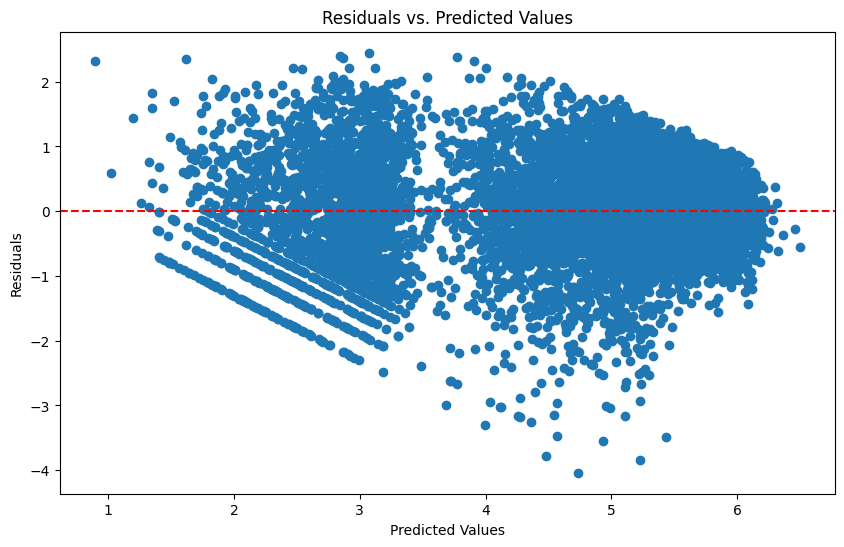

Mean Squared Error: 0.5931802639554578
R^2 Score: 0.7056886172739711


In [ ]:
pipelineElasticNet = Pipeline([
    ('scaler', StandardScaler()),
    ('elasticnet', ElasticNet(l1_ratio=1, max_iter=100, random_state=5))
])

# Define the parameter grid with alpha values for ElasticNet
param_grid = {
    'elasticnet__alpha': np.logspace(-3, 2, 100)  # Adjust alpha values as needed
}

# Setup GridSearchCV with 5-fold cross-validation
grid_searchElasticNet = GridSearchCV(estimator=pipelineElasticNet, param_grid=param_grid,
                                     scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_searchElasticNet.fit(X_train, y_train)

# Print the best alpha parameter found
print("Best alpha parameter:", grid_searchElasticNet.best_params_['elasticnet__alpha'])

# Get the best model
best_model = grid_searchElasticNet.best_estimator_

# Print coefficients of the final ElasticNet model
print("Coefficients of the final ElasticNet model:")
elasticnet_coefs = best_model.named_steps['elasticnet'].coef_
print(elasticnet_coefs)

# Predict on test set
y_pred = best_model.predict(X_test)

evaluate_model_residuals(y_test, y_pred)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.705e+02, tolerance: 1.742e+00
  model = cd_fast.enet_coordinate_descent(


Best alpha parameter: 0.0012618568830660211
Coefficients of the final ElasticNet model:
holiday: -0.021721906601464037
workingday: -0.0024988461046709966
temp: 0.567997672213672
atemp: 0.31091830308591584
hum: -0.16631436917013104
windspeed: -0.009714339078615075
season_spring: -0.10602466234126513
season_summer: -0.13904789537004697
season_winter: -0.1740761767024682
hr_evening: -0.07572072770438867
hr_morning: -0.09164429956210188
hr_night: -1.0257918718045849
weekday_mon: 0.0016611847948007458
weekday_sat: 0.030704215019936528
weekday_sun: 0.029300290427135958
weekday_thu: -0.00550174165381809
weekday_tue: -0.013703376137965463
weekday_wed: -0.027111819213105584
weathersit_heavy_rain: -0.003146973165077716
weathersit_light_rain: -0.10562563754721781
weathersit_mist: 0.020407797438742
temp_atemp: -0.5198833057044241
hum_windspeed: -0.04522725020200516
atemp_hum: -0.0
windspeed_temp: 0.04423668375037272


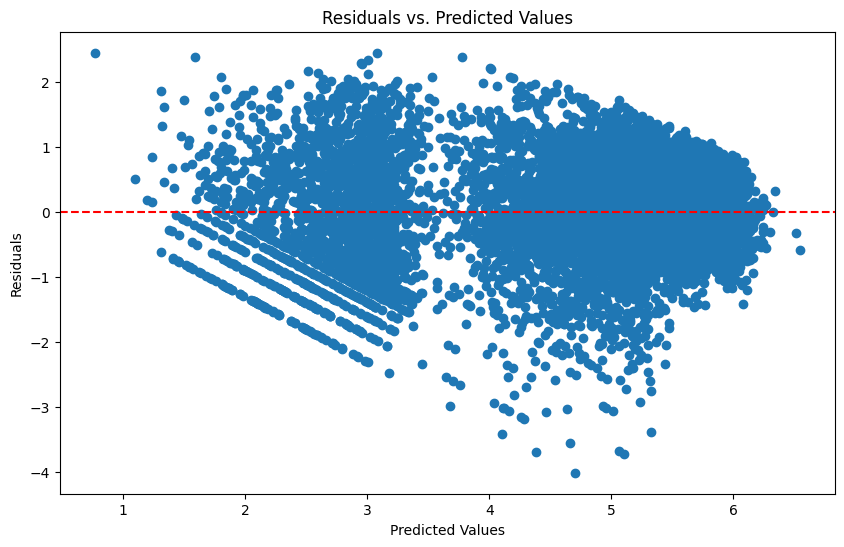

Mean Squared Error: 0.5940182208026432
R^2 Score: 0.7052728579283796


In [ ]:
# Interaction Terms & Log transform the target variable
train_data_log = train_data.copy()
test_data_log = test_data.copy()

train_data_log['temp_atemp'] = train_data_log['temp'] * train_data_log['atemp']
train_data_log['hum_windspeed'] = train_data_log['hum'] * train_data_log['windspeed']
train_data_log['atemp_hum'] = train_data_log['atemp'] * train_data_log['hum']
train_data_log['windspeed_temp'] = train_data_log['windspeed'] * train_data_log['temp']

test_data_log['temp_atemp'] = test_data_log['temp'] * test_data_log['atemp']
test_data_log['hum_windspeed'] = test_data_log['hum'] * test_data_log['windspeed']
test_data_log['atemp_hum'] = test_data_log['atemp'] * test_data_log['hum']
test_data_log['windspeed_temp'] = test_data_log['windspeed'] * test_data_log['temp']

# Prepare X and y for training and testing
X_train = train_data_log.drop(columns='cnt')
X_test = test_data_log.drop(columns='cnt')

y_train = np.log1p(train_data_log['cnt'])
y_test = np.log1p(test_data_log['cnt'])

# Define the pipeline
pipelineElasticNet = Pipeline([
    ('scaler', StandardScaler()),
    ('elasticnet', ElasticNet(l1_ratio=1, max_iter=100, random_state=5))
])

# Define the parameter grid with alpha values for ElasticNet
param_grid = {
    'elasticnet__alpha': np.logspace(-5, -1, 100)
}

# Setup GridSearchCV with 5-fold cross-validation
grid_searchElasticNet = GridSearchCV(estimator=pipelineElasticNet, param_grid=param_grid,
                                     scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_searchElasticNet.fit(X_train, y_train)

# Print the best alpha parameter found
print("Best alpha parameter:", grid_searchElasticNet.best_params_['elasticnet__alpha'])

# Get the best model
best_model = grid_searchElasticNet.best_estimator_

# Print coefficients of the final ElasticNet model
print("Coefficients of the final ElasticNet model:")
elasticnet_coefs = best_model.named_steps['elasticnet'].coef_
feature_names = X_train.columns
for feature, coef in zip(feature_names, elasticnet_coefs):
    print(f"{feature}: {coef}")

# Predict on test set
y_pred = best_model.predict(X_test)

evaluate_model_residuals(y_test, y_pred)

In [ ]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming train_data and test_data are already defined and loaded

train_data_log = train_data.copy()
test_data_log = test_data.copy()

# Create interaction terms
train_data_log['temp_atemp'] = train_data_log['temp'] * train_data_log['atemp']
train_data_log['hum_windspeed'] = train_data_log['hum'] * train_data_log['windspeed']
train_data_log['atemp_hum'] = train_data_log['atemp'] * train_data_log['hum']
train_data_log['windspeed_temp'] = train_data_log['windspeed'] * train_data_log['temp']

test_data_log['temp_atemp'] = test_data_log['temp'] * test_data_log['atemp']
test_data_log['hum_windspeed'] = test_data_log['hum'] * test_data_log['windspeed']
test_data_log['atemp_hum'] = test_data_log['atemp'] * test_data_log['hum']
test_data_log['windspeed_temp'] = test_data_log['windspeed'] * test_data_log['temp']

# Prepare X and y for training and testing
X_train = train_data_log.drop(columns='cnt')
X_test = test_data_log.drop(columns='cnt')

y_train = np.log1p(train_data_log['cnt'])
y_test = np.log1p(test_data_log['cnt'])

# Define the pipeline
pipelineLasso = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso(max_iter=1000, random_state=5))
])

# Define the parameter grid with alpha values for Lasso
param_grid = {
    'lasso__alpha': np.logspace(-5, -1, 100)
}

# Setup GridSearchCV with 5-fold cross-validation
grid_searchLasso = GridSearchCV(estimator=pipelineLasso, param_grid=param_grid,
                                scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_searchLasso.fit(X_train, y_train)

# Print the best alpha parameter found
print("Best alpha parameter:", grid_searchLasso.best_params_['lasso__alpha'])

# Get the best model
best_model = grid_searchLasso.best_estimator_

# Print coefficients of the final Lasso model
print("Coefficients of the final Lasso model:")
lasso_coefs = best_model.named_steps['lasso'].coef_
feature_names = X_train.columns
for feature, coef in zip(feature_names, lasso_coefs):
    print(f"{feature}: {coef}")

# Predict on test set
lasso_y_pred = best_model.predict(X_test)

# Evaluate model performance
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, lasso_y_pred)
r2 = r2_score(y_test, lasso_y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best alpha parameter: 0.0008697490026177834
Coefficients of the final Lasso model:
holiday: -0.02239924184773751
workingday: -0.005127953336836028
temp: 0.4470559312914496
atemp: 0.43362631481921243
hum: -0.1637413281078137
windspeed: -0.0
season_spring: -0.10476711180970551
season_summer: -0.13243582388284433
season_winter: -0.175751920585784
hr_evening: -0.07792198682700806
hr_morning: -0.09434373754297917
hr_night: -1.028046586034227
weekday_mon: 0.0
weekday_sat: 0.03195411957264146
weekday_sun: 0.027764636201730735
weekday_thu: -0.005361437000369013
weekday_tue: -0.01441807676053028
weekday_wed: -0.027296200065559904
weathersit_heavy_rain: -0.003461426708985285
weathersit_light_rain: -0.10536854977535286
weathersit_mist: 0.020871287523555004
temp_atemp: -0.5196050246803899
hum_windspeed: -0.045291750022255835
atemp_hum: -0.005631625388236538
windspeed_temp: 0.03745649582631217
Mean Squared Error: 0.59429164707659
R2 Sco

Lasso Model:
Mean Squared Error: 0.5943793275721722
R2 Score: 0.7050936917640451

Ridge Model:
Mean Squared Error: 0.5942158396847295
R2 Score: 0.7051748076560194

OLS Model:
Mean Squared Error: 0.5942146050251328
R2 Score: 0.7051754202427745


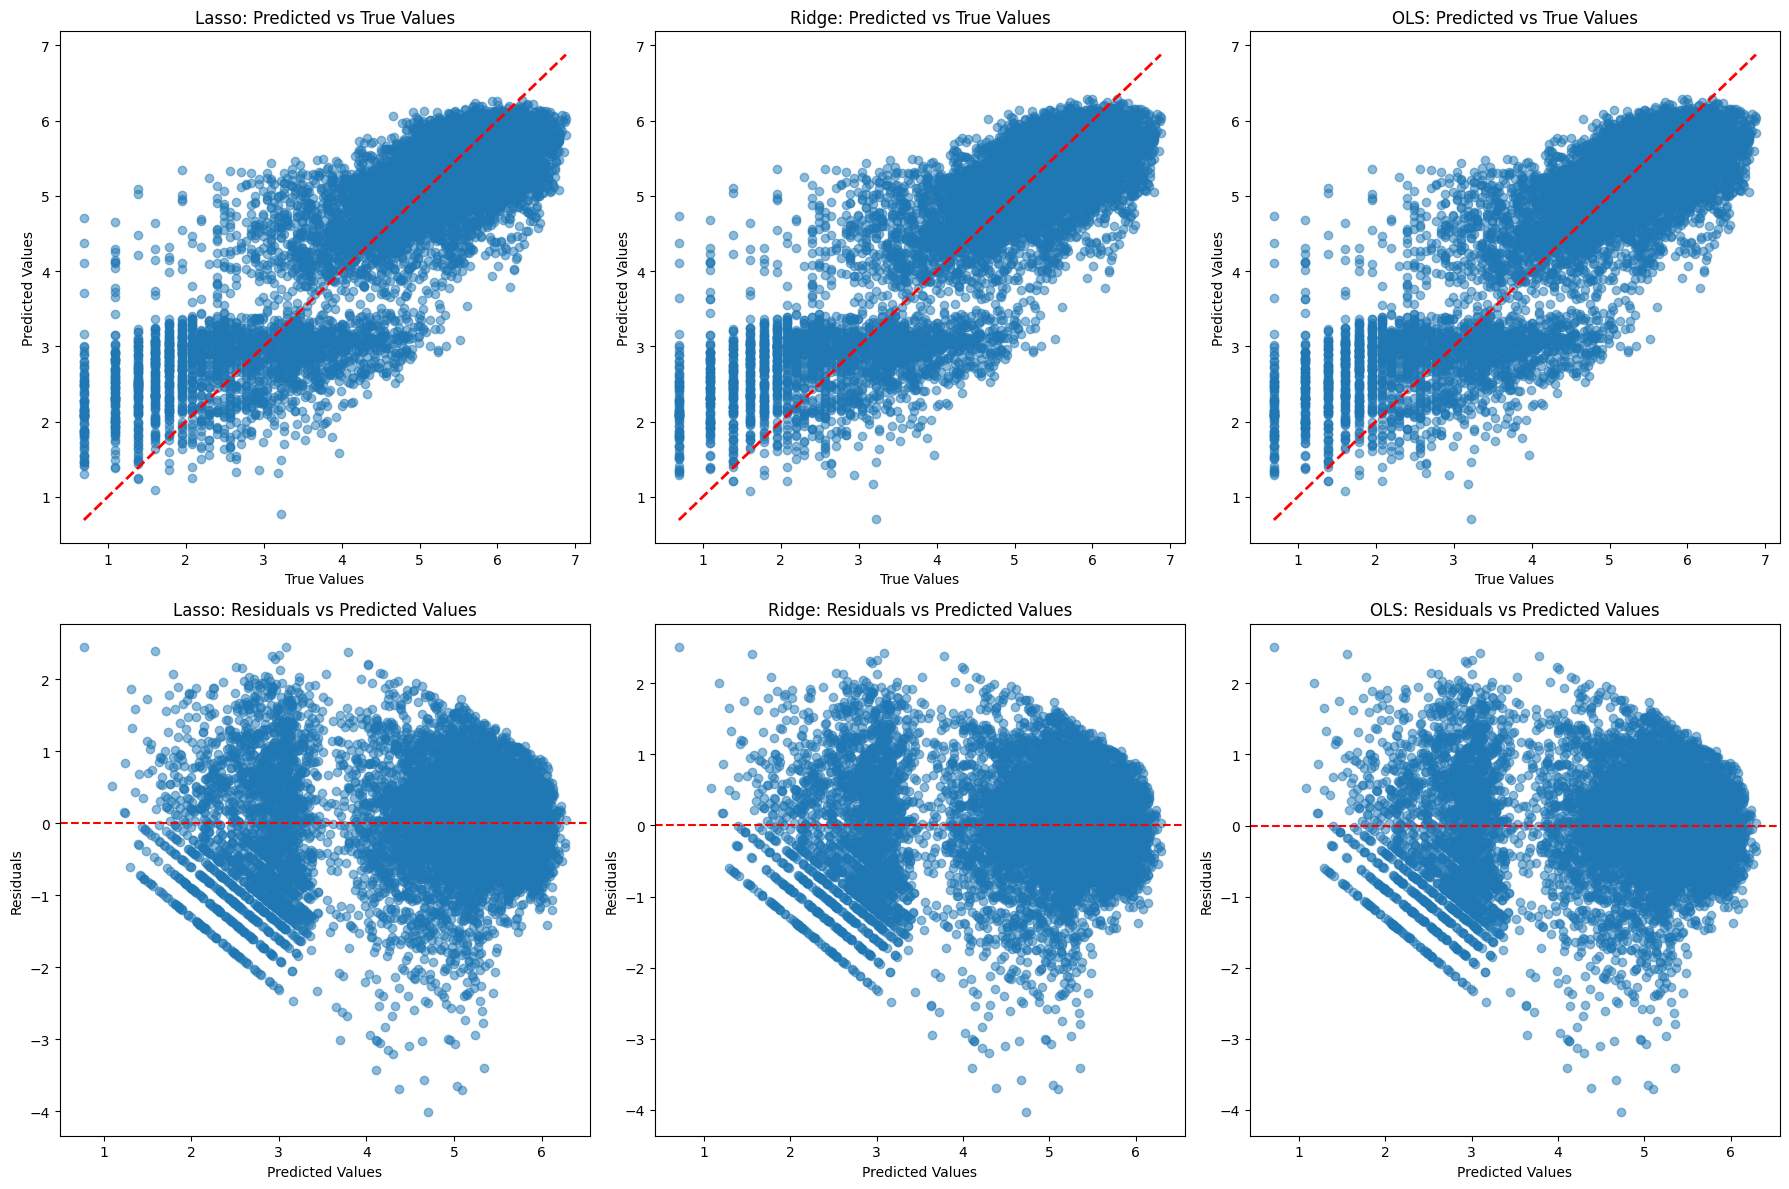

In [ ]:
# Assuming train_data and test_data are already defined and loaded

train_data_log = train_data.copy()
test_data_log = test_data.copy()

# Create interaction terms
train_data_log['temp_atemp'] = train_data_log['temp'] * train_data_log['atemp']
train_data_log['hum_windspeed'] = train_data_log['hum'] * train_data_log['windspeed']
train_data_log['atemp_hum'] = train_data_log['atemp'] * train_data_log['hum']
train_data_log['windspeed_temp'] = train_data_log['windspeed'] * train_data_log['temp']

test_data_log['temp_atemp'] = test_data_log['temp'] * test_data_log['atemp']
test_data_log['hum_windspeed'] = test_data_log['hum'] * test_data_log['windspeed']
test_data_log['atemp_hum'] = test_data_log['atemp'] * test_data_log['hum']
test_data_log['windspeed_temp'] = test_data_log['windspeed'] * test_data_log['temp']

X_train = train_data_log.drop(columns='cnt')
X_test = test_data_log.drop(columns='cnt')

y_train = np.log1p(train_data_log['cnt'])
y_test = np.log1p(test_data_log['cnt'])

# Lasso with optimal alpha
pipelineLasso = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso(alpha=0.0012618568830660211, max_iter=1000, random_state=5))
])
pipelineLasso.fit(X_train, y_train)
y_pred_lasso = pipelineLasso.predict(X_test)

# Ridge with optimal alpha
pipelineRidge = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=0.1, max_iter=1000, random_state=5))
])
pipelineRidge.fit(X_train, y_train)
y_pred_ridge = pipelineRidge.predict(X_test)

# OLS model
X_train_ols = sm.add_constant(X_train)
X_test_ols = sm.add_constant(X_test)
ols_model = sm.OLS(y_train, X_train_ols).fit()
y_pred_ols = ols_model.predict(X_test_ols)

# Evaluate the models
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ols = mean_squared_error(y_test, y_pred_ols)
r2_ols = r2_score(y_test, y_pred_ols)

print("Lasso Model:")
print(f"Mean Squared Error: {mse_lasso}")
print(f"R2 Score: {r2_lasso}\n")

print("Ridge Model:")
print(f"Mean Squared Error: {mse_ridge}")
print(f"R2 Score: {r2_ridge}\n")

print("OLS Model:")
print(f"Mean Squared Error: {mse_ols}")
print(f"R2 Score: {r2_ols}")


import matplotlib.pyplot as plt

def plot_model_performance(y_true, y_pred_lasso, y_pred_ridge, y_pred_ols):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

    # Plotting Predicted vs True Values for Lasso
    axes[0, 0].scatter(y_true, y_pred_lasso, alpha=0.5)
    axes[0, 0].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    axes[0, 0].set_title('Lasso: Predicted vs True Values')
    axes[0, 0].set_xlabel('True Values')
    axes[0, 0].set_ylabel('Predicted Values')

    # Plotting Predicted vs True Values for Ridge
    axes[0, 1].scatter(y_true, y_pred_ridge, alpha=0.5)
    axes[0, 1].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    axes[0, 1].set_title('Ridge: Predicted vs True Values')
    axes[0, 1].set_xlabel('True Values')
    axes[0, 1].set_ylabel('Predicted Values')

    # Plotting Predicted vs True Values for OLS
    axes[0, 2].scatter(y_true, y_pred_ols, alpha=0.5)
    axes[0, 2].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    axes[0, 2].set_title('OLS: Predicted vs True Values')
    axes[0, 2].set_xlabel('True Values')
    axes[0, 2].set_ylabel('Predicted Values')

    # Plotting Residuals for Lasso
    residuals_lasso = y_true - y_pred_lasso
    axes[1, 0].scatter(y_pred_lasso, residuals_lasso, alpha=0.5)
    axes[1, 0].axhline(y=0, color='r', linestyle='--')
    axes[1, 0].set_title('Lasso: Residuals vs Predicted Values')
    axes[1, 0].set_xlabel('Predicted Values')
    axes[1, 0].set_ylabel('Residuals')

    # Plotting Residuals for Ridge
    residuals_ridge = y_true - y_pred_ridge
    axes[1, 1].scatter(y_pred_ridge, residuals_ridge, alpha=0.5)
    axes[1, 1].axhline(y=0, color='r', linestyle='--')
    axes[1, 1].set_title('Ridge: Residuals vs Predicted Values')
    axes[1, 1].set_xlabel('Predicted Values')
    axes[1, 1].set_ylabel('Residuals')

    # Plotting Residuals for OLS
    residuals_ols = y_true - y_pred_ols
    axes[1, 2].scatter(y_pred_ols, residuals_ols, alpha=0.5)
    axes[1, 2].axhline(y=0, color='r', linestyle='--')
    axes[1, 2].set_title('OLS: Residuals vs Predicted Values')
    axes[1, 2].set_xlabel('Predicted Values')
    axes[1, 2].set_ylabel('Residuals')

    plt.tight_layout()
    plt.show()

# Assuming y_test is the true values and y_pred_lasso, y_pred_ridge, y_pred_ols are predictions from the models
plot_model_performance(y_test, y_pred_lasso, y_pred_ridge, y_pred_ols)


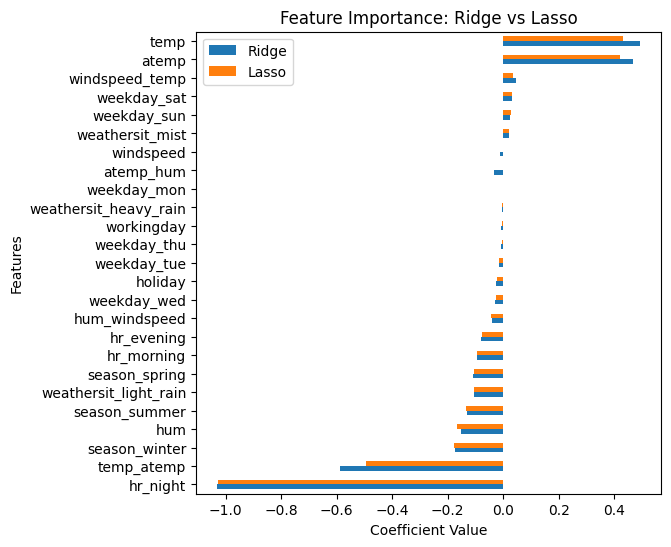

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_feature_importance_overlap(ridge_model, lasso_model, feature_names):
    ridge_coefs = ridge_model.named_steps['ridge'].coef_
    lasso_coefs = lasso_model.named_steps['lasso'].coef_

    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Ridge': ridge_coefs,
        'Lasso': lasso_coefs
    })

    # Sorting by Lasso coefficients
    importance_df = importance_df.set_index('Feature').sort_values(by='Lasso')

    # Plotting
    importance_df.plot(kind='barh', figsize=(6, 6))
    plt.title('Feature Importance: Ridge vs Lasso')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Features')
    plt.legend()
    plt.show()

# Assuming pipelineRidge and pipelineLasso are the trained models
plot_feature_importance_overlap(pipelineRidge, pipelineLasso, X_train.columns)


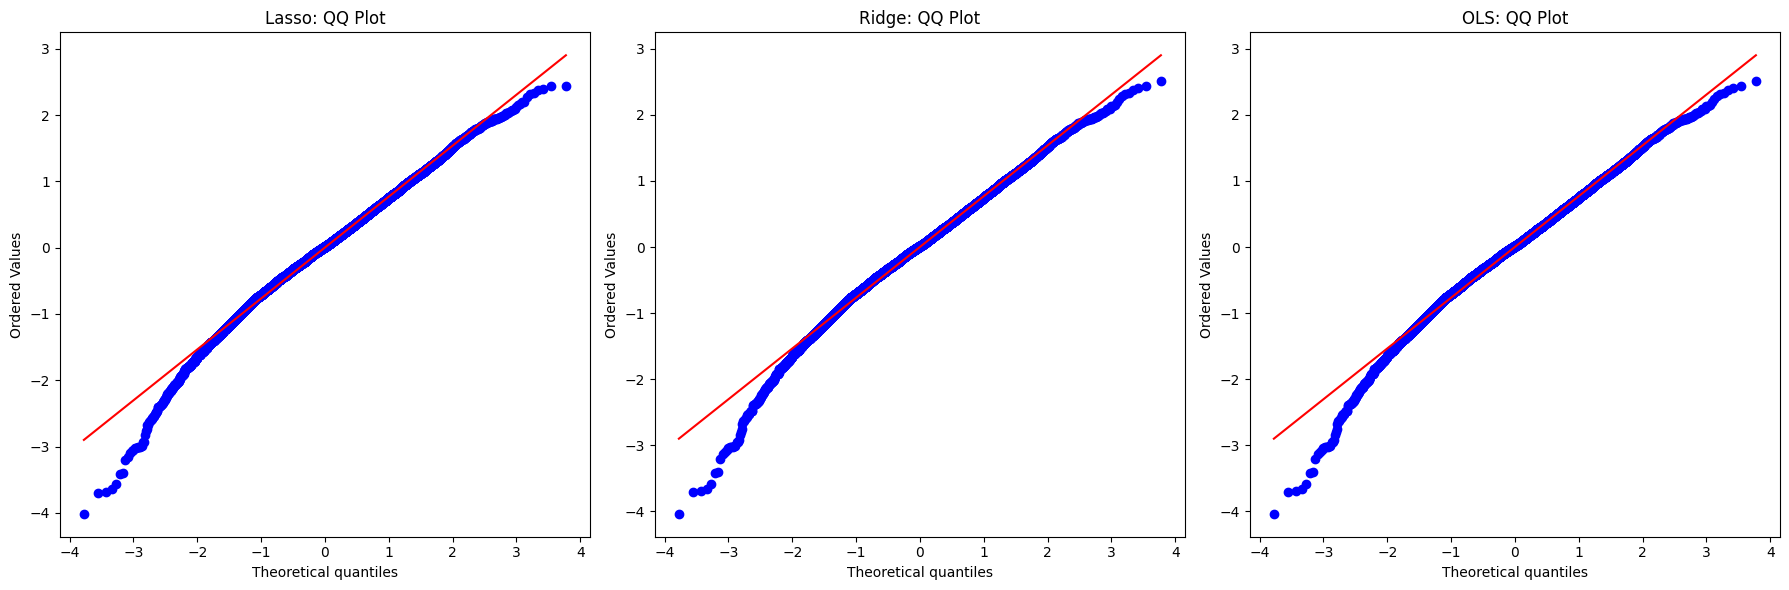

In [ ]:
import scipy.stats as stats

def plot_qq_plot(y_true, y_pred_lasso, y_pred_ridge, y_pred_ols):
    residuals_lasso = y_true - y_pred_lasso
    residuals_ridge = y_true - y_pred_ridge
    residuals_ols = y_true - y_pred_ols

    plt.figure(figsize=(18, 6))

    plt.subplot(1, 3, 1)
    stats.probplot(residuals_lasso, dist="norm", plot=plt)
    plt.title('Lasso: QQ Plot')

    plt.subplot(1, 3, 2)
    stats.probplot(residuals_ridge, dist="norm", plot=plt)
    plt.title('Ridge: QQ Plot')

    plt.subplot(1, 3, 3)
    stats.probplot(residuals_ols, dist="norm", plot=plt)
    plt.title('OLS: QQ Plot')

    plt.tight_layout()
    plt.show()

plot_qq_plot(y_test, y_pred_lasso, y_pred_ridge, y_pred_ols)


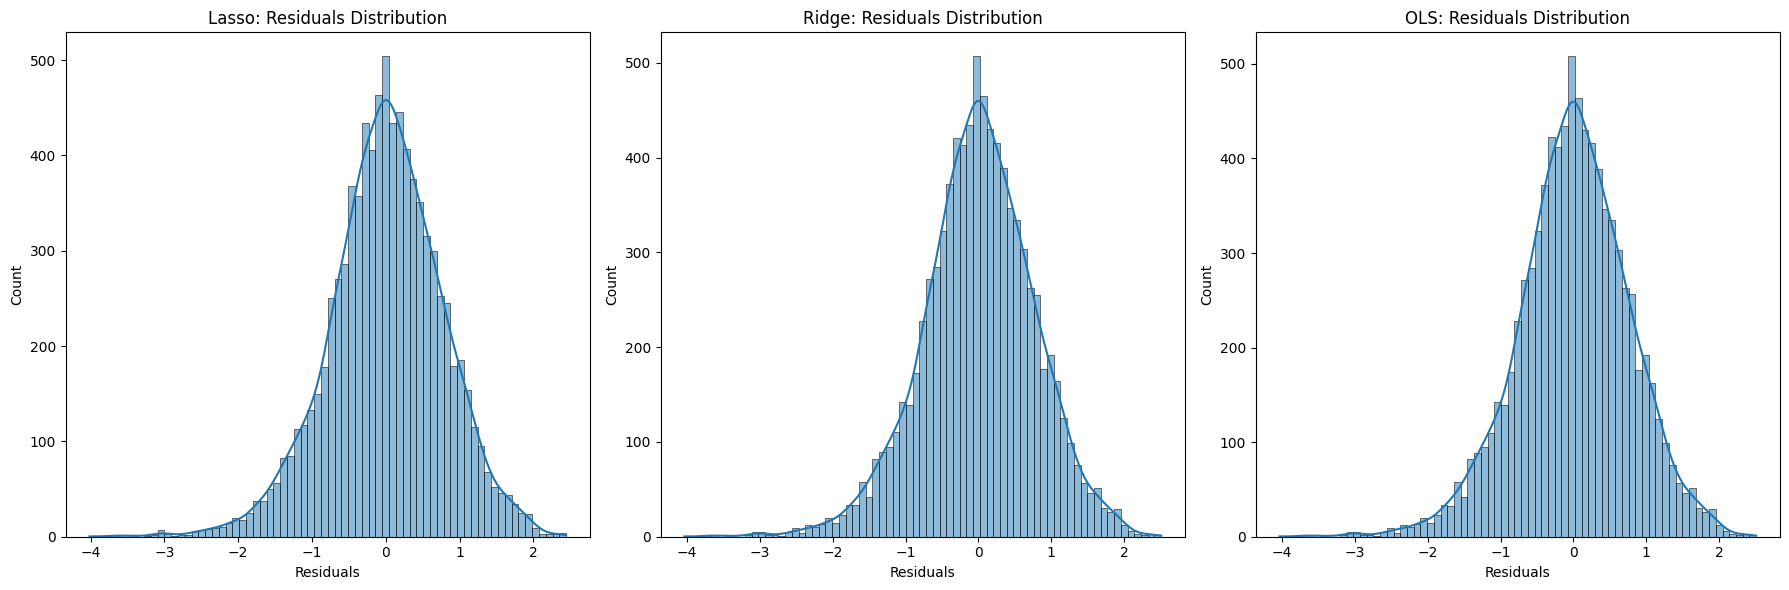

In [ ]:
import seaborn as sns

def plot_residuals_distribution(y_true, y_pred_lasso, y_pred_ridge, y_pred_ols):
    residuals_lasso = y_true - y_pred_lasso
    residuals_ridge = y_true - y_pred_ridge
    residuals_ols = y_true - y_pred_ols

    plt.figure(figsize=(18, 6))

    plt.subplot(1, 3, 1)
    sns.histplot(residuals_lasso, kde=True)
    plt.title('Lasso: Residuals Distribution')
    plt.xlabel('Residuals')

    plt.subplot(1, 3, 2)
    sns.histplot(residuals_ridge, kde=True)
    plt.title('Ridge: Residuals Distribution')
    plt.xlabel('Residuals')

    plt.subplot(1, 3, 3)
    sns.histplot(residuals_ols, kde=True)
    plt.title('OLS: Residuals Distribution')
    plt.xlabel('Residuals')

    plt.tight_layout()
    plt.show()

plot_residuals_distribution(y_test, y_pred_lasso, y_pred_ridge, y_pred_ols)


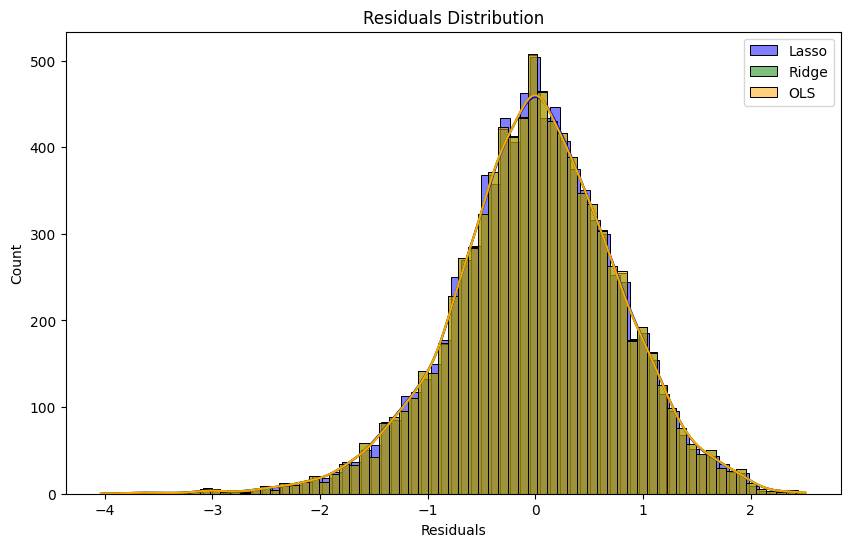

In [ ]:
def plot_residuals_distribution(y_true, y_pred_lasso, y_pred_ridge, y_pred_ols):
    residuals_lasso = y_true - y_pred_lasso
    residuals_ridge = y_true - y_pred_ridge
    residuals_ols = y_true - y_pred_ols

    plt.figure(figsize=(10, 6))
    sns.histplot(residuals_lasso, kde=True, label='Lasso', color='blue')
    sns.histplot(residuals_ridge, kde=True, label='Ridge', color='green')
    sns.histplot(residuals_ols, kde=True, label='OLS', color='orange')
    plt.title('Residuals Distribution')
    plt.xlabel('Residuals')
    plt.legend()
    plt.show()

plot_residuals_distribution(y_test, y_pred_lasso, y_pred_ridge, y_pred_ols)


### 4. Decision Tree Regressor
A Decision Tree Regressor is a non-linear model that uses a tree structure to from sklearn.tree import DecisionTreeRegressor predict the target variable. It splits the data into subsets based on feature values, creating branches until a prediction is made. This method is intuitive and handles both linear and non-linear relationships effectively.


Best parameters: {'ccp_alpha': 0.0012115276586285877}


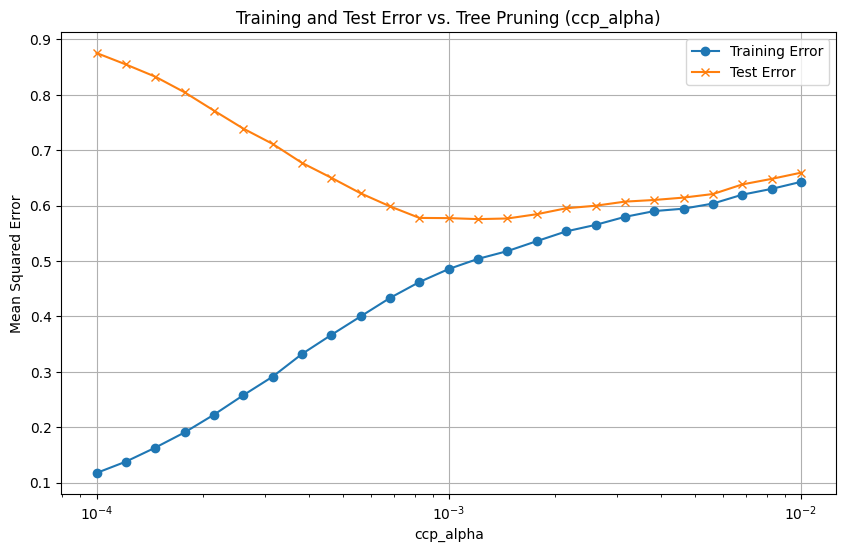

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

train_data_log = train_data.copy()
test_data_log = test_data.copy()

y_train = np.log1p(train_data_log['cnt'])
y_test = np.log1p(test_data_log['cnt'])

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'ccp_alpha': np.logspace(-4, -2, 25),  # Explore different pruning levels
}

clf = DecisionTreeRegressor(random_state=0)

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)

best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

# Extract the results from the grid search
results = grid_search.cv_results_
ccp_alphas = results['param_ccp_alpha'].data
mean_train_scores = -results['mean_train_score']
mean_test_scores = -results['mean_test_score']

# Create a plot for test error and training error
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, mean_train_scores, label='Training Error', marker='o')
plt.plot(ccp_alphas, mean_test_scores, label='Test Error', marker='x')
plt.xscale('log')
plt.xlabel('ccp_alpha')
plt.ylabel('Mean Squared Error')
plt.title('Training and Test Error vs. Tree Pruning (ccp_alpha)')
plt.legend()
plt.grid(True)
plt.show()

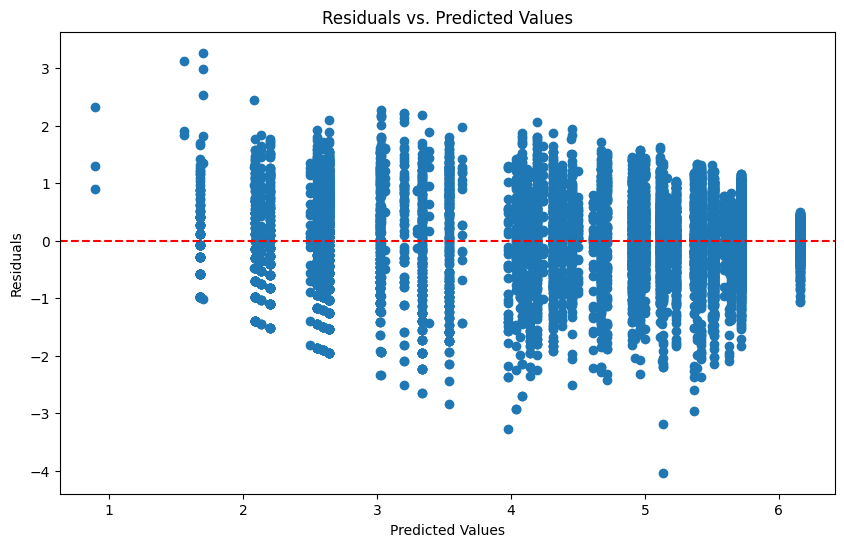

Mean Squared Error: 0.552936998203398
R^2 Score: 0.7256556524378199


In [ ]:
evaluate_model_residuals(y_test, y_pred)

Pruned Regression Tree:  0.552936998203398


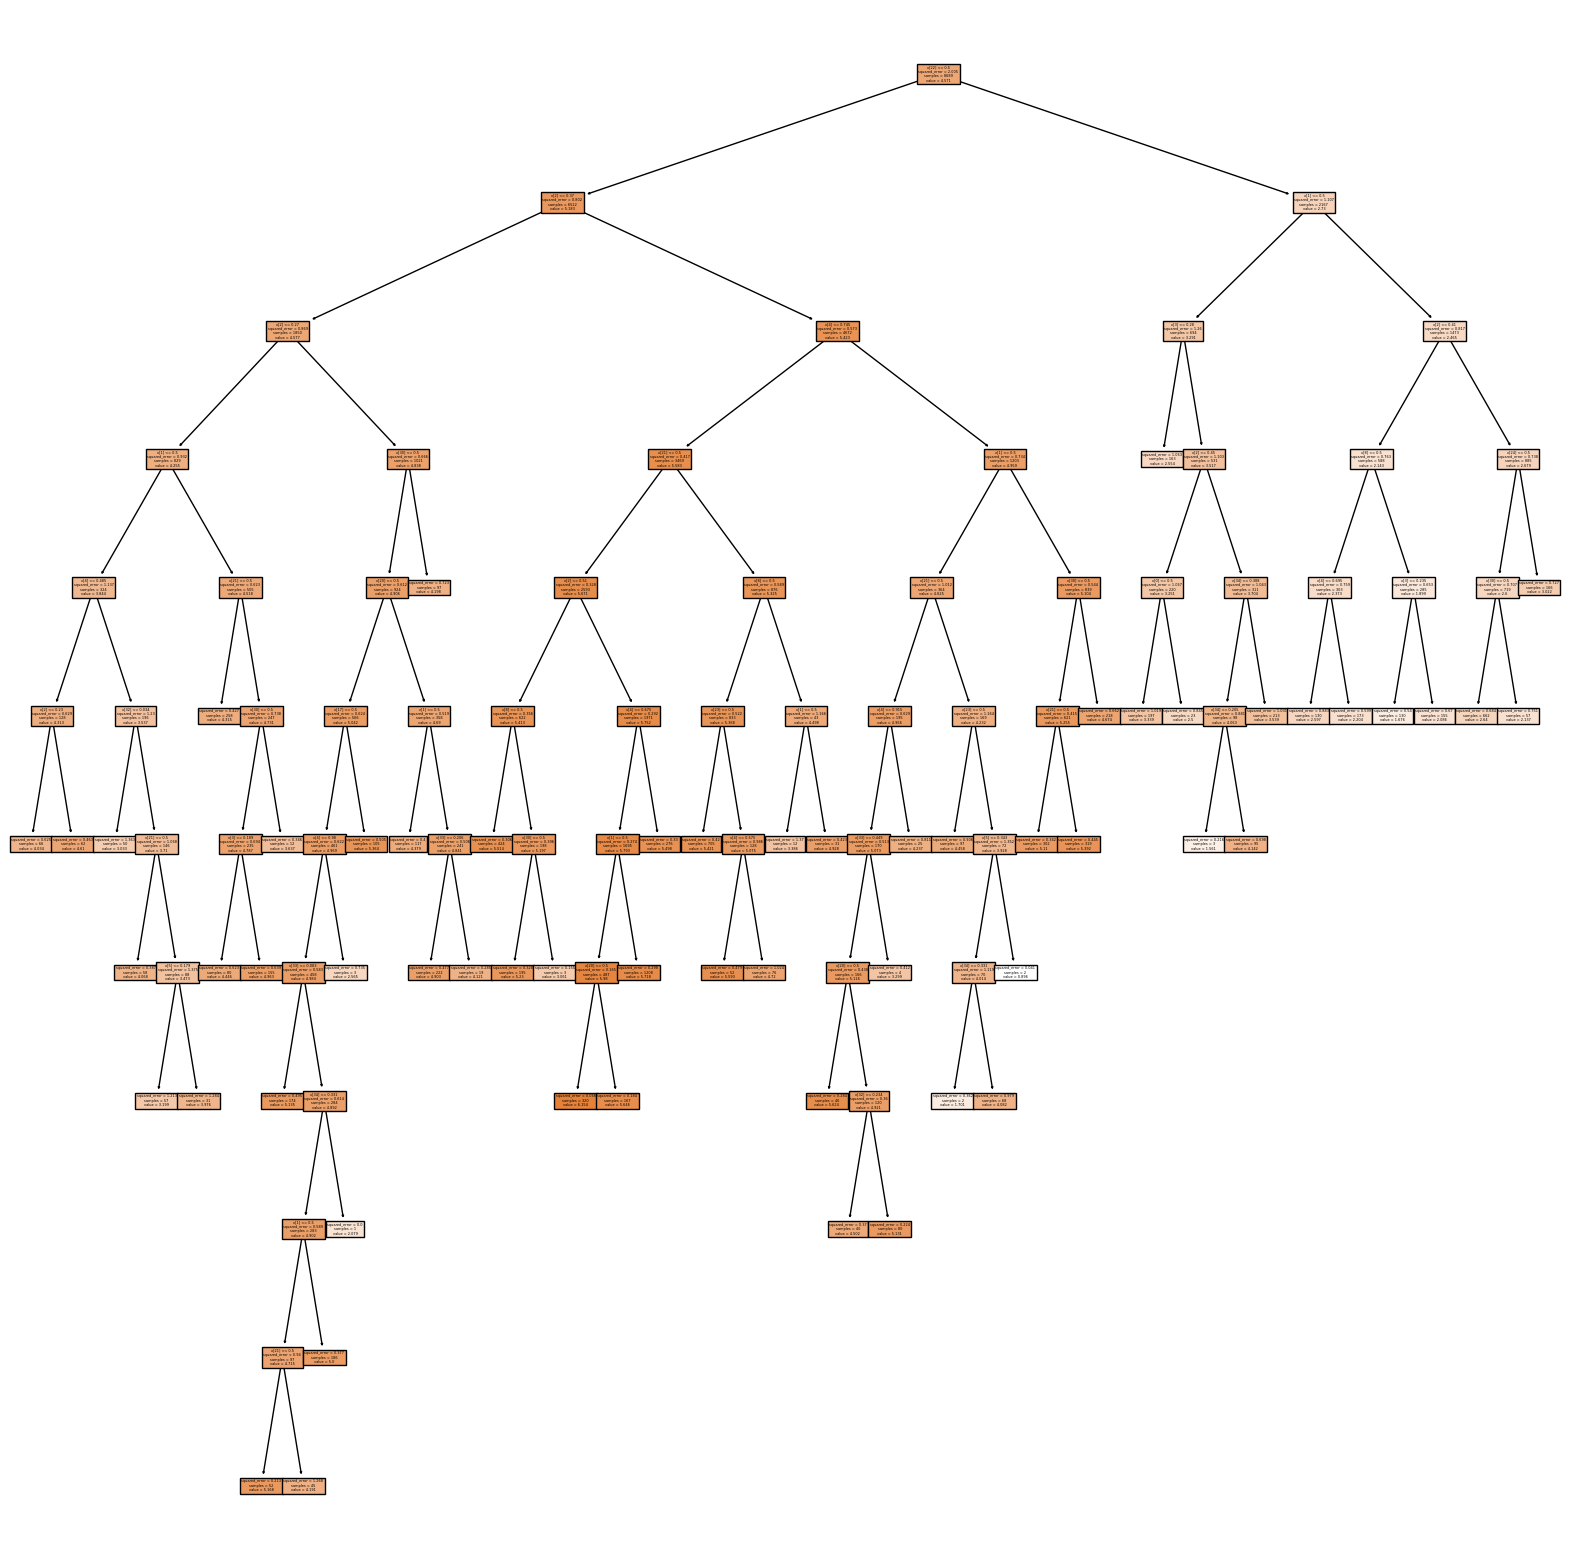

In [ ]:
from sklearn import tree

clf_ = tree.DecisionTreeRegressor(random_state=0,ccp_alpha=0.0012115276586285877)
clf_.fit(X_train,y_train)
y_pred = clf_.predict(X_test)
print('Pruned Regression Tree: ',np.mean((y_test - y_pred)**2))

plt.figure(figsize=(20,20))
tree.plot_tree(clf_,filled=True)
plt.show()

### 5. Random Forest Regressor
Random Forest Regressor is an ensemble learning method that builds multiple decision trees and merges them to get a more accurate and stable prediction. It reduces overfitting and improves the predictive power by averaging the results of various trees.

Feel free to adjust these blurbs to better fit the specific context of your analysis or to include any additional details relevant to your study.

Random Forest Regression:  0.48389462386957316


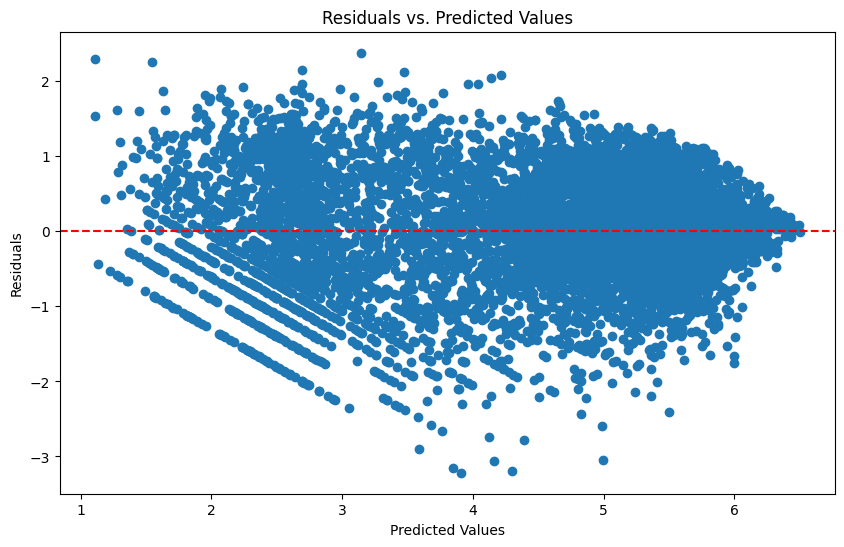

Mean Squared Error: 0.48389462386957316
R^2 Score: 0.7599116078220705


In [ ]:
forest_regr = RandomForestRegressor(max_depth=12, random_state=0)
forest_regr.fit(X_train, y_train)
y_pred = forest_regr.predict(X_test)
print('Random Forest Regression: ',np.mean((y_test - y_pred)**2))

evaluate_model_residuals(y_test, y_pred)

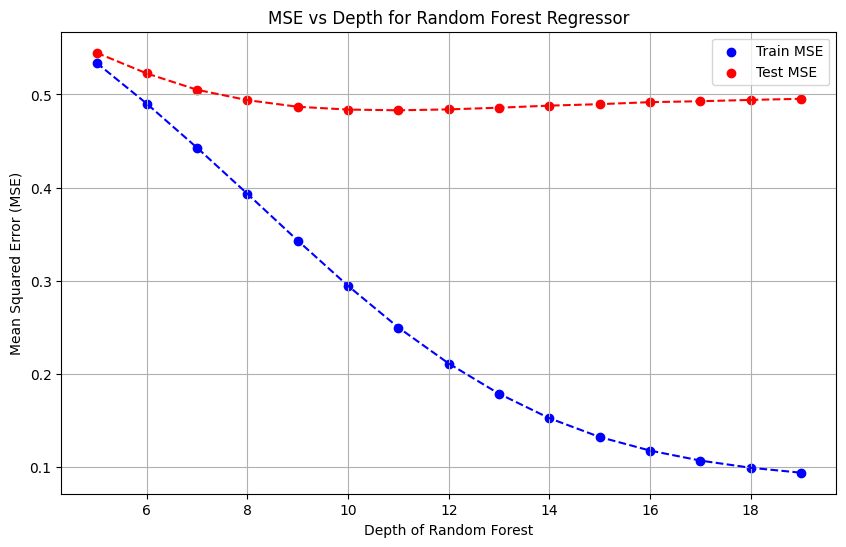

In [ ]:
# forest_regr = RandomForestRegressor(max_depth=12, random_state=0)
# forest_regr.fit(X_train, y_train)
# y_pred = forest_regr.predict(X_test)
# print('Random Forest Regression - tuned: ',np.mean((y_test - y_pred)**2))

train_acc = []
test_acc = []
depth = []

# Loop over different depths
for d in range(5, 20):
    forest_regr = RandomForestRegressor(max_depth=d, random_state=0)
    forest_regr.fit(X_train, y_train)
    y_train_pred = forest_regr.predict(X_train)
    y_test_pred = forest_regr.predict(X_test)
    train_acc.append(np.mean((y_train - y_train_pred)**2))
    test_acc.append(np.mean((y_test - y_test_pred)**2))
    depth.append(d)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(depth, train_acc, color='blue', label='Train MSE')
plt.scatter(depth, test_acc, color='red', label='Test MSE')
plt.plot(depth, train_acc, color='blue', linestyle='--')
plt.plot(depth, test_acc, color='red', linestyle='--')
plt.xlabel('Depth of Random Forest')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs Depth for Random Forest Regressor')
plt.legend()
plt.grid(True)
plt.show()


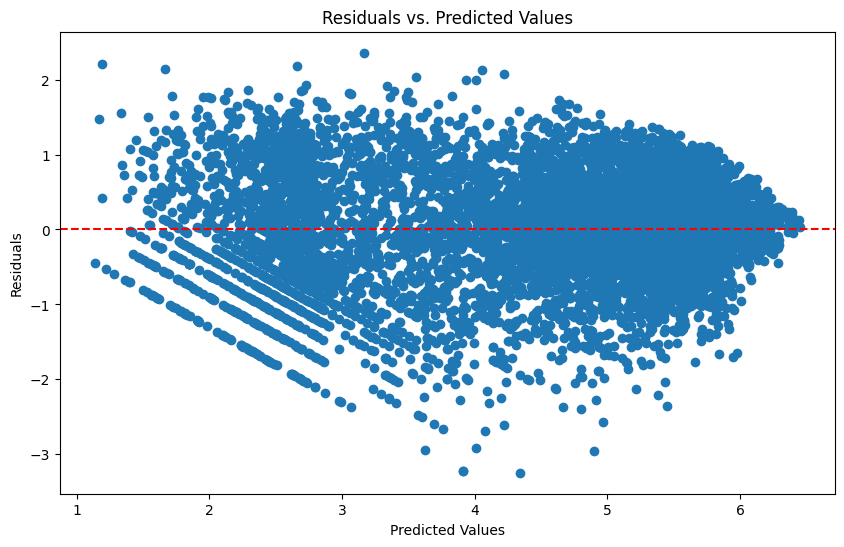

Mean Squared Error: 0.48292106013000063
R^2 Score: 0.7603946496691725


In [ ]:
forest_regr = RandomForestRegressor(max_depth=depth[test_acc.index(min(test_acc))], random_state=0)
forest_regr.fit(X_train, y_train)
y_pred = forest_regr.predict(X_test)

evaluate_model_residuals(y_test, y_pred)

In [ ]:
gbm_regr = GradientBoostingRegressor(random_state=0)
gbm_regr.fit(X_train, y_train)
y_pred = gbm_regr.predict(X_test)
print('Gradient Boosting Regression: ',np.mean((y_test - y_pred)**2))

Gradient Boosting Regression:  0.5127902880094188


In [ ]:
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(50, 150),
    'learning_rate': uniform(0.01, 0.1),
    'max_depth': randint(3, 7),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5)
}

# Initialize the GradientBoostingRegressor
gbm_regr = GradientBoostingRegressor(random_state=0)

# Set up the RandomizedSearchCV object with 5-fold cross-validation
random_search = RandomizedSearchCV(estimator=gbm_regr, param_distributions=param_dist,
                                   n_iter=50, cv=5, n_jobs=-1, random_state=0, verbose=1)

# Fit the model to the training data
random_search.fit(X_train, y_train)

# Get the best parameters from the random search
best_params = random_search.best_params_
print("Best parameters found: ", best_params)

# Train the model with the best parameters
optimized_gbm_regr = GradientBoostingRegressor(**best_params, random_state=0)
optimized_gbm_regr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = optimized_gbm_regr.predict(X_test)

# Print the mean squared error of the predictions
print('Optimized Gradient Boosting Regression MSE: ', np.mean((y_test - y_pred)**2))


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found:  {'learning_rate': 0.07235101011318683, 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 135}
Optimized Gradient Boosting Regression MSE:  0.48469501066620885


Pruned Regression Tree MSE: 0.2613035791921295
Pruned Regression Tree R^2: 0.8701726837437634
Random Forest Regression MSE: 0.17088478200518642
Random Forest Regression R^2: 0.9150967900808853
Optimized Gradient Boosting Regression MSE: 0.1414231308007452
Optimized Gradient Boosting Regression R^2: 0.9297346573469036


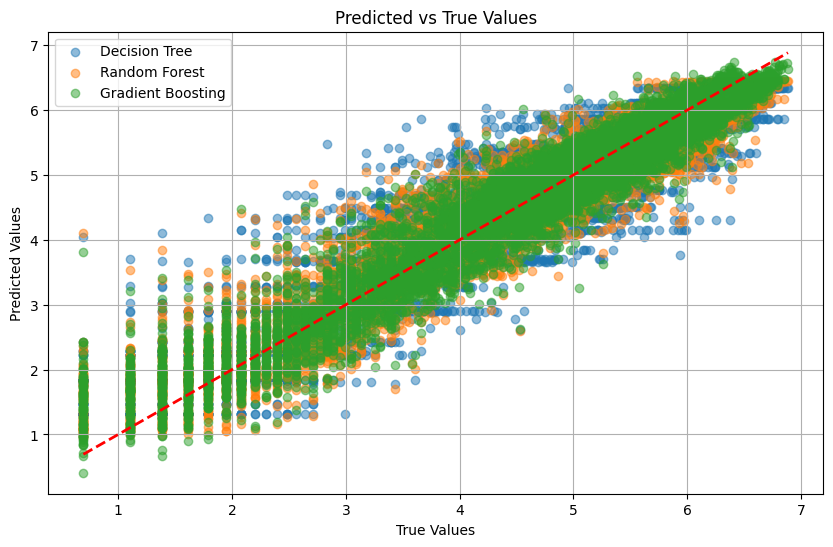

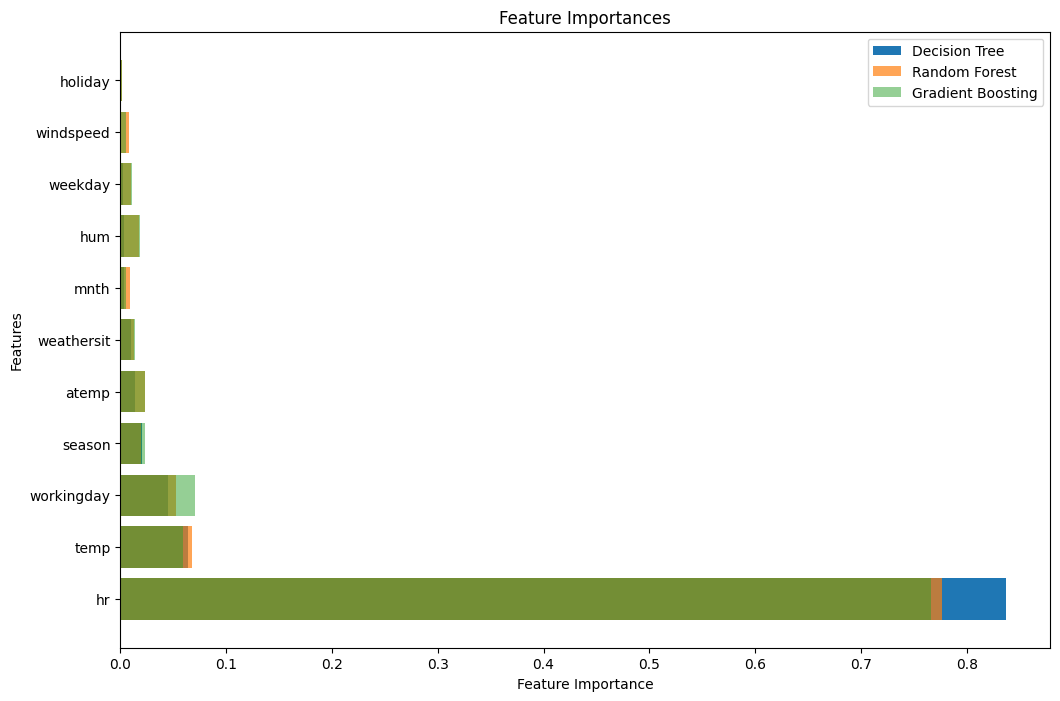

In [ ]:
data_raw = df.copy()

import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming train_data_log and test_data_log are prepared as per your initial code
X_train, X_test, y_train, y_test = train_test_split(data_raw.drop(columns=['cnt', 'dteday', 'yr']), np.log1p(data_raw['cnt']), test_size=0.5, random_state=42)

# Decision Tree Regressor with Pruning
clf_ = DecisionTreeRegressor(random_state=0, ccp_alpha=0.0012115276586285877)
clf_.fit(X_train, y_train)
y_pred_dtr = clf_.predict(X_test)
mse_dtr = np.mean((y_test - y_pred_dtr) ** 2)
print('Pruned Regression Tree MSE:', mse_dtr)
print('Pruned Regression Tree R^2:', r2_score(y_test, y_pred_dtr))

# Random Forest Regressor
forest_regr = RandomForestRegressor(max_depth=10, random_state=0)
forest_regr.fit(X_train, y_train)
y_pred_rfr = forest_regr.predict(X_test)
mse_rfr = np.mean((y_test - y_pred_rfr) ** 2)
print('Random Forest Regression MSE:', mse_rfr)
print('Random Forest Regression R^2:', r2_score(y_test, y_pred_rfr))

# Optimized Gradient Boosting Regressor
best_params = {'learning_rate': 0.07235101011318683, 'max_depth': 5, 'n_estimators': 250}
optimized_gbm_regr = GradientBoostingRegressor(**best_params, random_state=0)
optimized_gbm_regr.fit(X_train, y_train)
y_pred_gbr = optimized_gbm_regr.predict(X_test)
mse_gbr = np.mean((y_test - y_pred_gbr) ** 2)
print('Optimized Gradient Boosting Regression MSE:', mse_gbr)
print('Optimized Gradient Boosting Regression R^2:', r2_score(y_test, y_pred_gbr))

# Plot Predicted vs True values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dtr, alpha=0.5, label='Decision Tree')
plt.scatter(y_test, y_pred_rfr, alpha=0.5, label='Random Forest')
plt.scatter(y_test, y_pred_gbr, alpha=0.5, label='Gradient Boosting')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs True Values')
plt.legend()
plt.grid(True)
plt.show()

# Plot Feature Importances
importances_dtr = clf_.feature_importances_
importances_rfr = forest_regr.feature_importances_
importances_gbr = optimized_gbm_regr.feature_importances_

indices = np.argsort(importances_dtr)[::-1]
features = X_train.columns

plt.figure(figsize=(12, 8))
plt.barh(features[indices], importances_dtr[indices], label='Decision Tree')
plt.barh(features[indices], importances_rfr[indices], alpha=0.7, label='Random Forest')
plt.barh(features[indices], importances_gbr[indices], alpha=0.5, label='Gradient Boosting')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.legend()
plt.show()






  0%|          | 0/20 [00:00<?, ?it/s]


  5%|▌         | 1/20 [00:00<00:18,  1.05it/s]


 10%|█         | 2/20 [00:01<00:08,  2.07it/s]


 15%|█▌        | 3/20 [00:01<00:06,  2.54it/s]


 20%|██        | 4/20 [00:01<00:04,  3.56it/s]


  0%|          | 0/20 [00:42<?, ?it/s]



 35%|███▌      | 7/20 [00:01<00:02,  6.07it/s]


 45%|████▌     | 9/20 [00:02<00:02,  5.20it/s]


 50%|█████     | 10/20 [00:02<00:02,  4.99it/s]


 55%|█████▌    | 11/20 [00:03<00:04,  2.18it/s]


 60%|██████    | 12/20 [00:04<00:04,  1.68it/s]


 65%|██████▌   | 13/20 [00:05<00:03,  1.86it/s]


 70%|███████   | 14/20 [00:05<00:02,  2.38it/s]


 75%|███████▌  | 15/20 [00:05<00:01,  2.93it/s]


 80%|████████  | 16/20 [00:05<00:01,  3.52it/s]


 85%|████████▌ | 17/20 [00:06<00:01,  2.43it/s]


 90%|█████████ | 18/20 [00:06<00:00,  2.89it/s]


100%|██████████| 20/20 [00:07<00:00,  2.77it/s]


  0%|          | 0/20 [00:00<?, ?it/s]

  5%|▌         | 1/20 [00:21<06:51, 21.63s/it]

 10%|█         | 2/20 [00:30<04:

Optimized Decision Tree Regression MSE: 0.38773939311098127
Optimized Decision Tree Regression R^2: 0.8073537110740929
Optimized Random Forest Regression MSE: 0.1573639692339001
Optimized Random Forest Regression R^2: 0.9218145351692848
Optimized Gradient Boosting Regression MSE: 0.19939318308260667
Optimized Gradient Boosting Regression R^2: 0.900932540153346


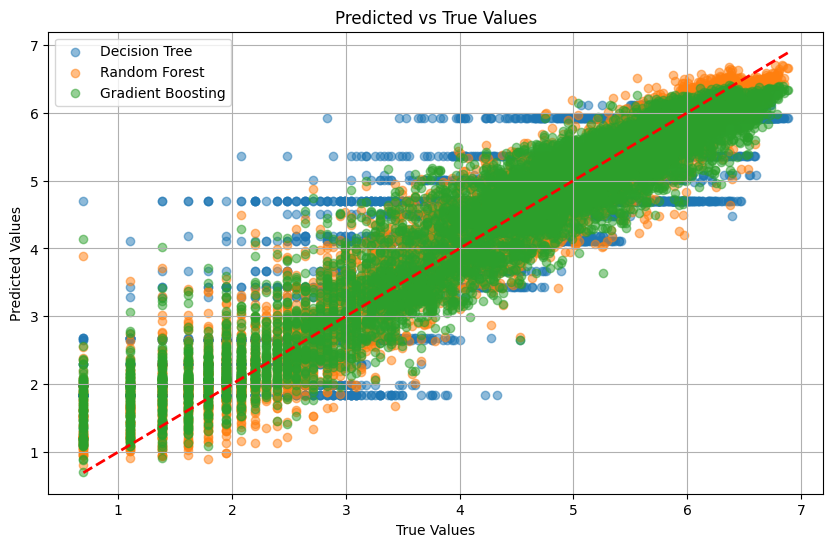

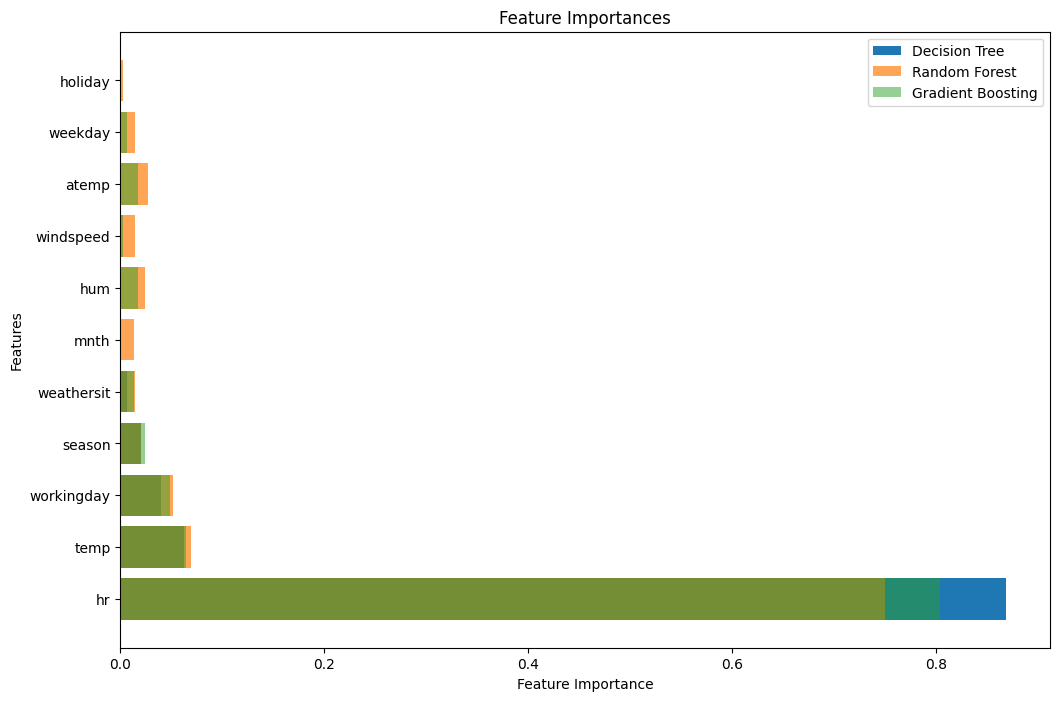

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, ParameterSampler, cross_val_score
from scipy.stats import randint, uniform
from tqdm import tqdm

# Assuming train_data_log and test_data_log are prepared as per your initial code
X_train, X_test, y_train, y_test = train_test_split(data_raw.drop(columns=['cnt', 'dteday', 'yr']), np.log1p(data_raw['cnt']), test_size=0.5, random_state=42)

# Define hyperparameter distributions
dtr_param_dist = {'max_depth': randint(1, 20), 'ccp_alpha': uniform(0.0001, 0.01)}
rfr_param_dist = {'n_estimators': randint(50, 300), 'max_depth': randint(5, 20)}
gbr_param_dist = {'learning_rate': uniform(0.01, 0.2), 'n_estimators': randint(100, 500)}

# Custom function to perform manual randomized search
def perform_manual_random_search(estimator, param_dist, X_train, y_train, total_iter):
    param_list = list(ParameterSampler(param_dist, n_iter=total_iter, random_state=42))
    best_estimator = None
    best_score = float('inf')
    tracker = tqdm(total=total_iter)

    for params in param_list:
        estimator.set_params(**params)
        estimator.fit(X_train, y_train)
        score = -np.mean(cross_val_score(estimator, X_train, y_train, scoring='neg_mean_squared_error', cv=5))
        if score < best_score:
            best_score = score
            best_estimator = estimator
        tracker.update(1)

    tracker.close()
    return best_estimator

# Perform manual randomized search for each model
best_dtr = perform_manual_random_search(DecisionTreeRegressor(random_state=0), dtr_param_dist, X_train, y_train, total_iter=20)
best_rfr = perform_manual_random_search(RandomForestRegressor(random_state=0), rfr_param_dist, X_train, y_train, total_iter=20)
best_gbr = perform_manual_random_search(GradientBoostingRegressor(random_state=0), gbr_param_dist, X_train, y_train, total_iter=20)

# Predictions
y_pred_dtr = best_dtr.predict(X_test)
y_pred_rfr = best_rfr.predict(X_test)
y_pred_gbr = best_gbr.predict(X_test)

# Calculate metrics
mse_dtr = mean_squared_error(y_test, y_pred_dtr)
mse_rfr = mean_squared_error(y_test, y_pred_rfr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)

r2_dtr = r2_score(y_test, y_pred_dtr)
r2_rfr = r2_score(y_test, y_pred_rfr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print('Optimized Decision Tree Regression MSE:', mse_dtr)
print('Optimized Decision Tree Regression R^2:', r2_dtr)
print('Optimized Random Forest Regression MSE:', mse_rfr)
print('Optimized Random Forest Regression R^2:', r2_rfr)
print('Optimized Gradient Boosting Regression MSE:', mse_gbr)
print('Optimized Gradient Boosting Regression R^2:', r2_gbr)

# Plot Predicted vs True values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dtr, alpha=0.5, label='Decision Tree')
plt.scatter(y_test, y_pred_rfr, alpha=0.5, label='Random Forest')
plt.scatter(y_test, y_pred_gbr, alpha=0.5, label='Gradient Boosting')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs True Values')
plt.legend()
plt.grid(True)
plt.show()

# Plot Feature Importances
importances_dtr = best_dtr.feature_importances_
importances_rfr = best_rfr.feature_importances_
importances_gbr = best_gbr.feature_importances_

indices_dtr = np.argsort(importances_dtr)[::-1]
indices_rfr = np.argsort(importances_rfr)[::-1]
indices_gbr = np.argsort(importances_gbr)[::-1]
features = X_train.columns

plt.figure(figsize=(12, 8))
plt.barh(features[indices_dtr], importances_dtr[indices_dtr], label='Decision Tree')
plt.barh(features[indices_rfr], importances_rfr[indices_rfr], alpha=0.7, label='Random Forest')
plt.barh(features[indices_gbr], importances_gbr[indices_gbr], alpha=0.5, label='Gradient Boosting')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.legend()
plt.show()


In [ ]:
# Assuming best_dtr, best_rfr, and best_gbr are the best models obtained from the searches

# Print out the optimal parameters for each model
print('Optimal parameters for Decision Tree Regressor:', best_dtr.get_params())
print('Optimal parameters for Random Forest Regressor:', best_rfr.get_params())
print('Optimal parameters for Gradient Boosting Regressor:', best_gbr.get_params())


Optimal parameters for Decision Tree Regressor: {'ccp_alpha': 0.00694233026512157, 'criterion': 'squared_error', 'max_depth': 15, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 0, 'splitter': 'best'}
Optimal parameters for Random Forest Regressor: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 15, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 108, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
Optimal parameters for Gradient Boosting Regressor: {'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.04410482473745831, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'm

Pruned Regression Tree MSE: 0.2613035791921295
Pruned Regression Tree R^2: 0.8701726837437634
Random Forest Regression MSE: 0.1573639692339001
Random Forest Regression R^2: 0.9218145351692848
Optimized Gradient Boosting Regression MSE: 0.1414231308007452
Optimized Gradient Boosting Regression R^2: 0.9297346573469036


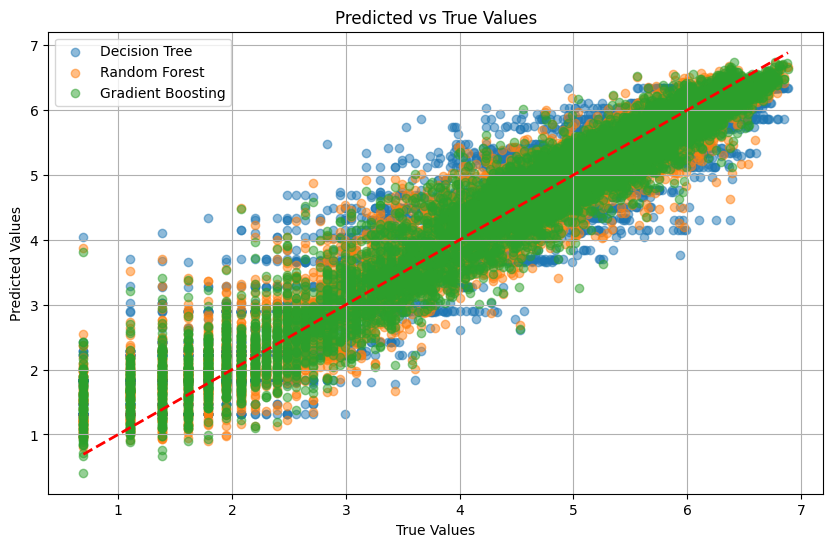

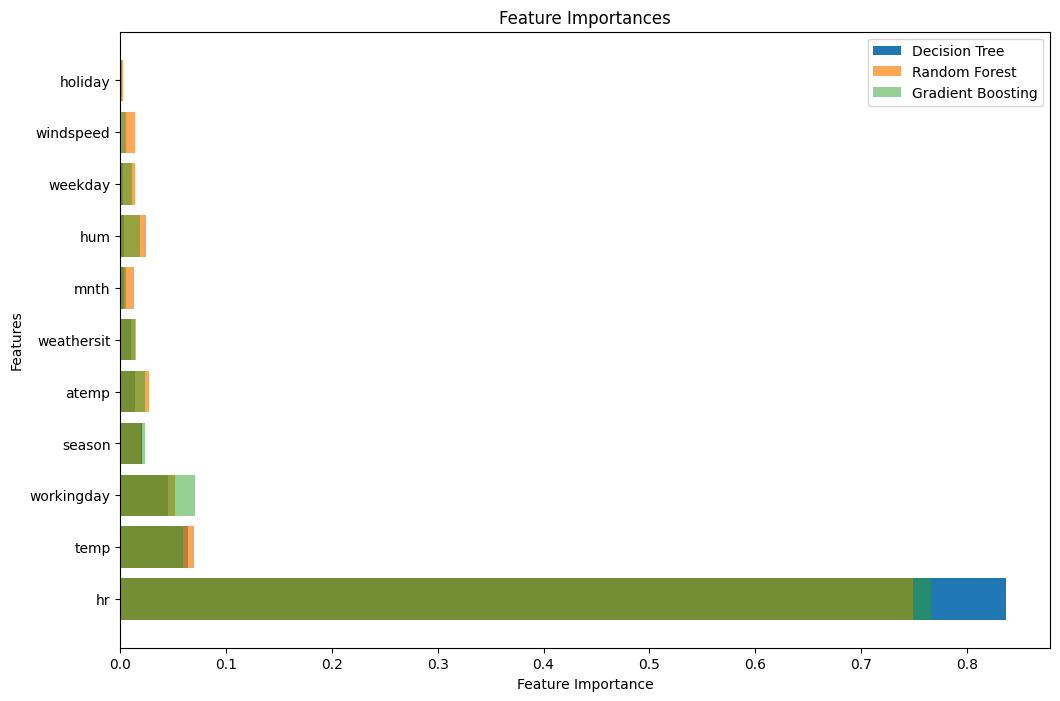

In [ ]:
# Assuming train_data_log and test_data_log are prepared as per your initial code
X_train, X_test, y_train, y_test = train_test_split(data_raw.drop(columns=['cnt', 'dteday', 'yr']), np.log1p(data_raw['cnt']), test_size=0.5, random_state=42)

# Decision Tree Regressor with Pruning
clf_ = DecisionTreeRegressor(random_state=0, ccp_alpha=0.0012115276586285877, max_depth=15)
clf_.fit(X_train, y_train)
y_pred_dtr = clf_.predict(X_test)
mse_dtr = np.mean((y_test - y_pred_dtr) ** 2)
print('Pruned Regression Tree MSE:', mse_dtr)
print('Pruned Regression Tree R^2:', r2_score(y_test, y_pred_dtr))

# Random Forest Regressor
forest_regr = RandomForestRegressor(max_depth=15, n_estimators=108, random_state=0)
forest_regr.fit(X_train, y_train)
y_pred_rfr = forest_regr.predict(X_test)
mse_rfr = np.mean((y_test - y_pred_rfr) ** 2)
print('Random Forest Regression MSE:', mse_rfr)
print('Random Forest Regression R^2:', r2_score(y_test, y_pred_rfr))

# Optimized Gradient Boosting Regressor
best_params = {'learning_rate': 0.07235101011318683, 'max_depth': 5, 'n_estimators': 250}
optimized_gbm_regr = GradientBoostingRegressor(**best_params, random_state=0)
optimized_gbm_regr.fit(X_train, y_train)
y_pred_gbr = optimized_gbm_regr.predict(X_test)
mse_gbr = np.mean((y_test - y_pred_gbr) ** 2)
print('Optimized Gradient Boosting Regression MSE:', mse_gbr)
print('Optimized Gradient Boosting Regression R^2:', r2_score(y_test, y_pred_gbr))

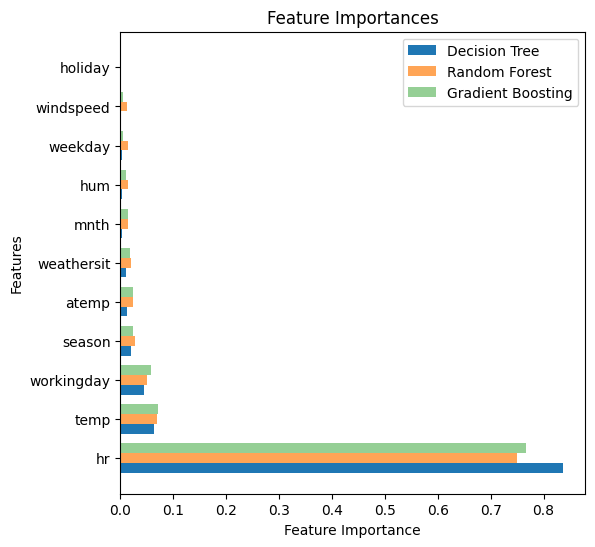

In [ ]:
importances_dtr = clf_.feature_importances_
importances_rfr = forest_regr.feature_importances_
importances_gbr = optimized_gbm_regr.feature_importances_

indices_dtr = np.argsort(importances_dtr)[::-1]
indices_rfr = np.argsort(importances_rfr)[::-1]
indices_gbr = np.argsort(importances_gbr)[::-1]
features = X_train.columns

# Set the bar width
bar_width = 0.25

# Set the positions of the bars on the x-axis
r1 = np.arange(len(indices_dtr))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.figure(figsize=(6, 6))

# Create bars
plt.barh(r1, importances_dtr[indices_dtr], height=bar_width, label='Decision Tree')
plt.barh(r2, importances_rfr[indices_rfr], height=bar_width, alpha=0.7, label='Random Forest')
plt.barh(r3, importances_gbr[indices_gbr], height=bar_width, alpha=0.5, label='Gradient Boosting')

# Add feature names to the y-axis
plt.yticks([r + bar_width for r in range(len(indices_dtr))], features[indices_dtr])

plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.legend()
plt.show()

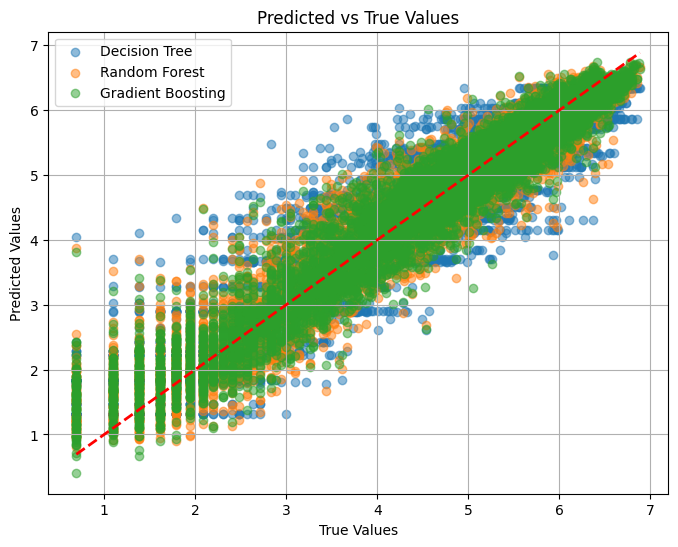

In [ ]:
# Plot Predicted vs True values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_dtr, alpha=0.5, label='Decision Tree')
plt.scatter(y_test, y_pred_rfr, alpha=0.5, label='Random Forest')
plt.scatter(y_test, y_pred_gbr, alpha=0.5, label='Gradient Boosting')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs True Values')
plt.legend()
plt.grid(True)
plt.show()